<h1 style='color: blue; font-size: 34px; font-weight: bold;'> Projeto Proposto 
</h1>

<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
<i> Este projeto baseia-se no Estudo das Técnicas de Estatística Inferencial para Regressão Linear e Correlação. O intuito é analisar os resultados do ENEM no estado de São Paulo do ano de 2019.  </i>       
</p>  

# <font color='red' style='font-size: 40px;'>Library and Data </font>

In [292]:
# Convencionais
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette('Accent')
sns.set_style('darkgrid')

# Suporte
import handcalcs.render

In [293]:
enem_sp = pd.read_csv('enem_2019_tratado.csv', sep = ',', encoding='iso-8859-1')
print(enem_sp.shape)
enem_sp.head()

(499940, 28)


,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,IDADE,SEXO,TP_ESTADO_CIVIL,RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,ESCOLA,CO_ESCOLA,...,NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,COMP1,COMP2,COMP3,COMP4,COMP5,NOTA_REDACAO,INTERNET
0,"1,90E+11",Santa Isabel,22,M,1,parda,1,1,não_respondeu,NaN,...,600.2,Inglês,1.0,160.0,200.0,180.0,200.0,200.0,940.0,Sim
1,"1,90E+11",São Paulo,17,F,1,parda,1,2,privada,15567761.0,...,731.8,Inglês,1.0,160.0,120.0,200.0,200.0,200.0,880.0,Não
2,"1,90E+11",São Bernardo do Campo,19,M,1,parda,1,2,pública,35904958.0,...,393.2,Espanhol,1.0,80.0,160.0,120.0,100.0,100.0,560.0,Sim
3,"1,90E+11",Embu-Guaçu,17,F,1,parda,1,2,pública,NaN,...,419.2,Inglês,1.0,120.0,120.0,120.0,120.0,80.0,560.0,Sim
4,"1,90E+11",Guarulhos,23,F,1,branca,1,1,não_respondeu,NaN,...,796.1,Inglês,1.0,160.0,200.0,180.0,180.0,160.0,880.0,Sim


# <font color='red' style='font-size: 30px;'>1.0 Correlação de Pearson </font>
<hr style='border: 2px solid red;'>




<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
<i> Introdução sobre Conceitos de Correlação.</i>     
</p>    


<hr>

> CONSULTAR: 

https://universidadedosdados.medium.com/multicollinearity-is-not-correlation-38014cbfc710

## 1.1) O que é?

> 1. A correlação de Pearson avalia a relação linear entre duas variáveis contínuas

> 2. Pode ser um valor entre -1 e 1.

> 3. A correlação de A ~ B é a mesma que B ~ A.

> 4. Correlação mais próxima de 0: Correlação Fraca; Correlação mais próxima de 1: Correlação Forte

> 5. É uma correlação com o teste paramétrico, necessitando de alguns requisitos, como Normalidade.

> 6. Os coeficientes de correlação de Pearson medem somente relações lineares.

## 1.2) Identificando Visualmente

> 1. Quando a correlação é forte, um gráfico de dispersão terá seus dados arranjados de uma maneira linear ou próxima.

> 2. Quando a correlação é fraca, um gráfico de dispersão terá seus dados muito espalhados.

> 3. Quando a correlação é positiva, significa que a medida que a variável X cresce, Y cresce também.

> 4. Quando a correlação é negativa, significa que a medida que a variável X cresce, Y diminui.

> 5. A correlação pode ser não linear. Neste caso, precisamos montar um modelo matemático não linear.

> 6. Quando os pontos estão mais agrupados, a correlação é forte, quanto estão mais dispersos, ela é moderada.

<img src = './img40.png' width = '70%'>
<img src = './img187.png' width = '70%'>
<img src='./img188.png' width='70%'>



## 1.3) Covariância 

> 1. A covariância, ou variância conjunta, é a medida do grau de interdependência (ou inter-relação) numérica entre duas variáveis. É definida da seguinte maneira:

<img src='./img191.png' width='70%'>

### Covariância populacional

# $$\sigma_{xy} = \frac 1n\sum_{i=1}^{n}(X_i-\mu_x)(Y_i-\mu_y)$$

### Covariância amostral

# $$S_{xy} = \frac 1{n-1}\sum_{i=1}^{n}(X_i-\bar{X})(Y_i-\bar{Y})$$

onde $n$ é o número de pares que foram comparados

### Interpretação da Covariância 

> 1. Valor de $S_{xy}$ positivo indica uma associação linear positiva entre x e y, ou seja, à medida que o valor de x aumenta, o valor de y também aumenta. Neste caso, podemos ver na figura abaixo que os pontos que têm a maior influência sobre $S_{xy}$ devem estar nos quadrantes I e III.

> 2. Se o valor de $S_{xy}$ for negativo temos um indicativo de associação linear negativa entre x e y, ou seja, à medida que x aumenta, o valor de y diminui. Neste caso, podemos ver na figura abaixo que os pontos que têm a maior influência sobre $S_{xy}$ devem estar nos quadrantes II e IV.

> 3. Finalmente, se os pontos estiverem uniformemente distribuídos pelos quadrantes, o valor de $S_{xy}$ se aproximará de zero, indicando que não existe nenhuma associação linear entre x e y.

<img src="https://caelum-online-public.s3.amazonaws.com/1273-estatistica-parte4/01/img026.png" width=50%>



## 1.4) Cálculo do Coeficiente de Pearson 

> 1. É obtido dividindo-se a covariância da população ou amostra pelo produto do desvio padrão populacional ou amostral de x pelo desvio padrão populacional ou amostral de y.

> 2. O coeficiente de correlação varia de -1 a +1. Valores que se aproximam de -1 ou +1 indicam uma relação linear forte. Quanto mais próxima a correlação estiver de zero, mais fraca será a relação.

> 3. Um ponto importante é que o coeficiente de correlação é uma medida de associação linear e não necessariamente de causação. Uma correlação alta entre duas variáveis não significa, necessariamente, que variações em uma delas provocará alterações na outra.

<img src='./img192.png' width='70%'>

### Coeficiente de correlação de Pearson - dados populacionais

# $$\rho = \frac{\sigma_{xy}}{\sigma_{x}\sigma_{y}} = \frac {\sum_{i=1}^{n}(X_i-\mu_x)(Y_i-\mu_y)} {{(n)}{\sigma_{x}\sigma_{y}}}$$


### Coeficiente de correlação de Pearson - dados amostrais

# $$r = \frac{s_{xy}}{s_{x}s_{y}} = \frac {\sum_{i=1}^{n}(X_i-\bar{X})(Y_i-\bar{Y})} {{(n-1)}{s_{x}s_{y}}}$$


Onde

$\sigma_{xy}$ = covariância populacional entre x e y

$s_{xy}$ = covariância amostral entre x e y

$\sigma_{x}$ e $\sigma_{y}$ = desvios padrão populacionais de x e y, respectivamente

$s_{x}$ e $s_{y}$ = desvios padrão amostrais de x e y, respectivamente

<img src = './img41.png' width = '70%'>

## 1.5) Correlação e Causalidade

> 1. Correlação não significa que exista Causalidade.

> 2. Correlação são duas variáveis interligadas matemáticamente.

> 3. Causalidade são duas variáveis que, por acaso, aparentam estar ligadas, mas não estão.

## 1.6) Teste de Hipótese para o Coeficiente de Correlação de Pearson

> 1. É um teste paramétrico.

# $$ t = \frac {r}{\sigma_{r}} = \frac {r} {\sqrt{\frac {1-{r}^2} {n - 2} }}$$

$gl$ = n - 2 = graus de liberdade






In [294]:
from scipy.stats import t as t_student

tabela_t_student = pd.DataFrame(
    [],
    index = [i for i in range (1, 31)],
    columns = [i / 100 for i in range (10, 0, -1)]
)

for index in tabela_t_student.index:
    for column in tabela_t_student.columns:
        tabela_t_student.loc[index, column] = t_student.ppf(1 - float(column) / 2, index)

index = [('Graus de Liberdade (n - 1)', i) for i in range(1,31)]
tabela_t_student.index = pd.MultiIndex.from_tuples(index)
columns = [("{0:0.3f}".format(i/100), "{0:0.3f}".format(i/100/2)) for i in range(10, 0, -1)]
tabela_t_student.columns = pd.MultiIndex.from_tuples(columns)

tabela_t_student.rename_axis(['Bicaudal', 'Unicaudal'], axis = 1, inplace = True)
tabela_t_student

Bicaudal                          0.100     0.090     0.080     0.070  \
Unicaudal                         0.050     0.045     0.040     0.035   
Graus de Liberdade (n - 1) 1   6.313752  7.026366  7.915815  9.057887   
                           2   2.919986  3.103977  3.319764  3.578247   
                           3   2.353363  2.470807  2.605427  2.762599   
                           4   2.131847    2.2261  2.332873  2.455892   
                           5   2.015048  2.097837  2.190958  2.297392   
                           6    1.94318  2.019201  2.104306  2.201059   
                           7   1.894579  1.966153  2.046011  2.136453   
                           8   1.859548  1.927986  2.004152  2.090166   
                           9   1.833113  1.899222  1.972653  2.055395   
                           10  1.812461  1.876774  1.948099  2.028327   
                           11  1.795885  1.858772  1.928427  2.006663   
                           12  1.782288  1.844015  1.912313  1.988934   
                           13  1.770933    1.8317  1.898874  1.974158   
                           14   1.76131  1.821267  1.887496  1.961656   
                           15   1.75305  1.812316  1.877739   1.95094   
                           16  1.745884  1.804553  1.869279  1.941654   
                           17  1.739607  1.797755  1.861875   1.93353   
                           18  1.734064  1.791754   1.85534  1.926362   
                           19  1.729133  1.786417   1.84953  1.919992   
                           20  1.724718   1.78164  1.844331  1.914292   
                           21  1.720743  1.777339  1.839651  1.909164   
                           22  1.717144  1.773447  1.835417  1.904524   
                           23  1.713872  1.769907  1.831567  1.900307   
                           24  1.710882  1.766675  1.828051  1.896457   
                           25  1.708141  1.763711  1.824828  1.892928   
                           26  1.705618  1.760983  1.821863  1.889682   
                           27  1.703288  1.758466  1.819126  1.886686   
                           28  1.701131  1.756134  1.816592  1.883912   
                           29  1.699127  1.753968  1.814238  1.881336   
                           30  1.697261  1.751952  1.812047  1.878938   

Bicaudal                           0.060      0.050      0.040      0.030  \
Unicaudal                          0.030      0.025      0.020      0.015   
Graus de Liberdade (n - 1) 1   10.578895  12.706205  15.894545  21.204949   
                           2    3.896425   4.302653   4.848732   5.642778   
                           3     2.95051   3.182446   3.481909   3.896046   
                           4    2.600762   2.776445   2.998528    3.29763   
                           5    2.421585   2.570582   2.756509   3.002875   
                           6    2.313263   2.446912   2.612242   2.828928   
                           7    2.240879   2.364624   2.516752   2.714573   
                           8    2.189155   2.306004   2.448985   2.633814   
                           9    2.150375   2.262157   2.398441   2.573804   
                           10   2.120234   2.228139   2.359315   2.527484   
                           11   2.096139   2.200985    2.32814   2.490664   
                           12   2.076441   2.178813   2.302722     2.4607   
                           13   2.060038   2.160369   2.281604   2.435845   
                           14   2.046169   2.144787   2.263781   2.414898   
                           15   2.034289    2.13145    2.24854   2.397005   
                           16      2.024   2.119905   2.235358   2.381545   
                           17   2.015002   2.109816   2.223845   2.368055   
                           18   2.007067   2.100922   2.213703    2.35618   
                           19   2.000017   2.093024   2.204701   2.345648   
                           20   1.993713   2.0

## 1.7) Exemplo

In [295]:
colegiox = enem_sp.loc[enem_sp.CO_ESCOLA == 35017632.0]
print(colegiox.shape)

(41, 28)


In [296]:
nota_final = ['NOTA_CN', 'NOTA_CH', 'NOTA_MT', 'NOTA_LC', 'NOTA_REDACAO']
colegiox['nota_final'] = colegiox[nota_final].mean(axis = 1)
colegiox.head()

C:\Users\leova\AppData\Local\Temp/ipykernel_9512/124103591.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  colegiox['nota_final'] = colegiox[nota_final].mean(axis = 1)


,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,IDADE,SEXO,TP_ESTADO_CIVIL,RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,ESCOLA,CO_ESCOLA,...,TP_LINGUA,TP_STATUS_REDACAO,COMP1,COMP2,COMP3,COMP4,COMP5,NOTA_REDACAO,INTERNET,nota_final
37,"1,90E+11",Águas de Lindóia,18,M,1,branca,1,2,pública,35017632.0,...,Inglês,1.0,120.0,40.0,40.0,120.0,20.0,340.0,Sim,385.58
44,"1,90E+11",Águas de Lindóia,17,F,1,parda,1,2,pública,35017632.0,...,Inglês,1.0,140.0,120.0,140.0,160.0,160.0,720.0,Não,548.42
52,"1,90E+11",Águas de Lindóia,17,F,1,branca,1,2,pública,35017632.0,...,Espanhol,1.0,120.0,120.0,120.0,120.0,80.0,560.0,Não,399.60
65,"1,90E+11",Águas de Lindóia,17,M,1,parda,1,2,pública,35017632.0,...,Inglês,1.0,120.0,120.0,120.0,120.0,40.0,520.0,Sim,446.16
79,"1,90E+11",Águas de Lindóia,18,F,1,branca,1,2,pública,35017632.0,...,Espanhol,1.0,120.0,120.0,120.0,140.0,140.0,640.0,Sim,433.62


In [297]:
notas_colegiox = colegiox[['NOTA_CN', 'NOTA_CH', 'NOTA_MT', 'NOTA_LC', 'NOTA_REDACAO', 'nota_final']]
notas_colegiox.head(2)

,NOTA_CN,NOTA_CH,NOTA_MT,NOTA_LC,NOTA_REDACAO,nota_final
37,46.3,447.2,537.1,557.3,340.0,385.58
44,505.9,534.5,451.9,529.8,720.0,548.42


### Gráfico de Correlação

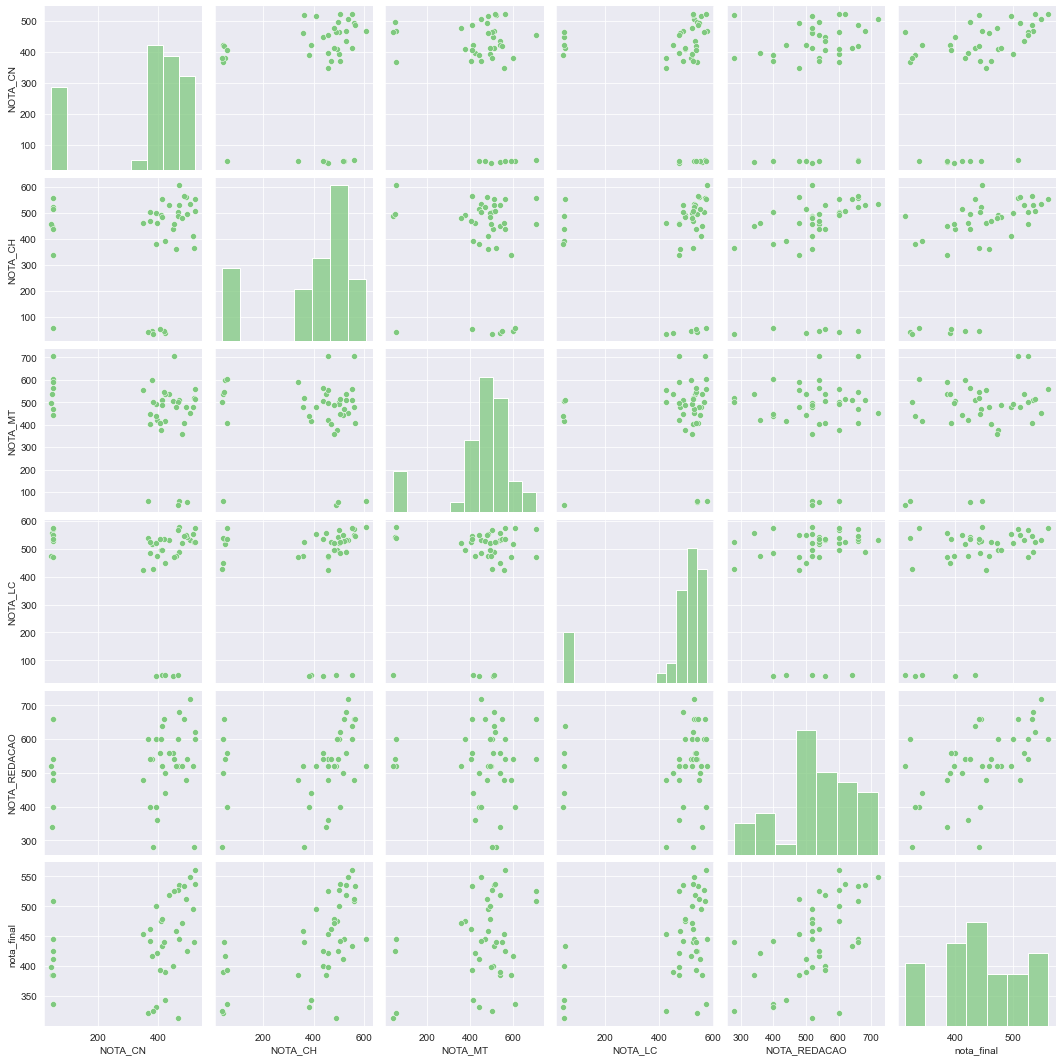

In [298]:
sns.pairplot(notas_colegiox)

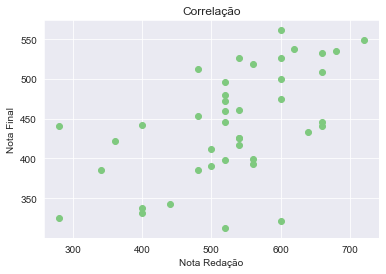

In [299]:
plt.scatter(notas_colegiox.NOTA_REDACAO, notas_colegiox.nota_final)
plt.title('Correlação')
plt.xlabel('Nota Redação')
plt.ylabel('Nota Final')
plt.grid(True)
plt.show()

               NOTA_CN   NOTA_CH   NOTA_MT   NOTA_LC  NOTA_REDACAO  nota_final
NOTA_CN       1.000000  0.083520 -0.299411 -0.158243      0.132366    0.352986
NOTA_CH       0.083520  1.000000 -0.078817 -0.040875      0.264781    0.579168
NOTA_MT      -0.299411 -0.078817  1.000000  0.137463     -0.024316    0.322042
NOTA_LC      -0.158243 -0.040875  0.137463  1.000000      0.125635    0.472561
NOTA_REDACAO  0.132366  0.264781 -0.024316  0.125635      1.000000    0.551220
nota_final    0.352986  0.579168  0.322042  0.472561      0.551220    1.000000


<AxesSubplot:>

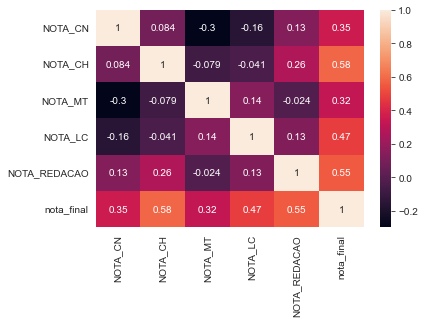

In [300]:
# Caso seja dados paramétricos
correlacoes = notas_colegiox.corr(method='pearson')
print(correlacoes)

plt.figure()
sns.heatmap(correlacoes, annot = True)

In [301]:
# Caso seja dados não paramétricos
correlacoes = notas_colegiox.corr(method='spearman')
correlacoes

,NOTA_CN,NOTA_CH,NOTA_MT,NOTA_LC,NOTA_REDACAO,nota_final
NOTA_CN,1.000000,0.320049,-0.206620,0.118293,0.244312,0.546864
NOTA_CH,0.320049,1.000000,-0.178841,0.336077,0.437328,0.674158
NOTA_MT,-0.206620,-0.178841,1.000000,0.022997,0.021279,0.134843
NOTA_LC,0.118293,0.336077,0.022997,1.000000,0.247201,0.352613
NOTA_REDACAO,0.244312,0.437328,0.021279,0.247201,1.000000,0.556488
nota_final,0.546864,0.674158,0.134843,0.352613,0.556488,1.000000


### Entendendo se as Distribuições são Normais ou Não

In [302]:
# Teste de Shapiro-Wilk

# H0 = distribuição normal: p > 0.05
# H0 = distribuição não normal: p <= 0.05


import scipy.stats as stats
print(f'Nota Redação: {stats.shapiro(notas_colegiox.NOTA_REDACAO)}')

if stats.shapiro(notas_colegiox.NOTA_REDACAO)[1] > 0.05:
    print('Distribuição Normal')
else:
    print('A Distribuição não é Normal')

print()

print(f'Nota Matemática: {stats.shapiro(notas_colegiox.NOTA_MT)}')

if stats.shapiro(notas_colegiox.NOTA_MT)[1] > 0.05:
    print('Distribuição Normal')
else:
    print('A Distribuição não é Normal')

print()

print(f'Nota Ciências da Natureza: {stats.shapiro(notas_colegiox.NOTA_CN)}')

if stats.shapiro(notas_colegiox.NOTA_CN)[1] > 0.05:
    print('Distribuição Normal')
else:
    print('A Distribuição não é Normal')

print()

print(f'Nota Linguagens e Códigos: {stats.shapiro(notas_colegiox.NOTA_LC)}')

if stats.shapiro(notas_colegiox.NOTA_LC)[1] > 0.05:
    print('Distribuição Normal')
else:
    print('A Distribuição não é Normal')

print()

print(f'Nota Ciências Humanas: {stats.shapiro(notas_colegiox.NOTA_CH)}')

if stats.shapiro(notas_colegiox.NOTA_CH)[1] > 0.05:
    print('Distribuição Normal')
else:
    print('A Distribuição não é Normal')

print()

print(f'Nota Final: {stats.shapiro(notas_colegiox.nota_final)}')

if stats.shapiro(notas_colegiox.nota_final)[1] > 0.05:
    print('Distribuição Normal')
else:
    print('A Distribuição não é Normal')

Nota Redação: ShapiroResult(statistic=0.9529760479927063, pvalue=0.08905317634344101)
Distribuição Normal

Nota Matemática: ShapiroResult(statistic=0.7985674738883972, pvalue=5.104634965391597e-06)
A Distribuição não é Normal

Nota Ciências da Natureza: ShapiroResult(statistic=0.7349032163619995, pvalue=2.9953517355352233e-07)
A Distribuição não é Normal

Nota Linguagens e Códigos: ShapiroResult(statistic=0.5986173152923584, pvalue=2.2351389628028073e-09)
A Distribuição não é Normal

Nota Ciências Humanas: ShapiroResult(statistic=0.7509257793426514, pvalue=5.865651360181801e-07)
A Distribuição não é Normal

Nota Final: ShapiroResult(statistic=0.9638937711715698, pvalue=0.21482008695602417)
Distribuição Normal


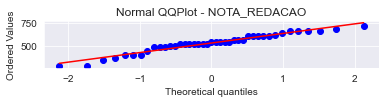

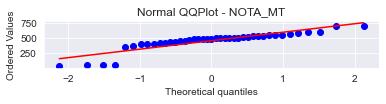

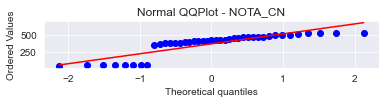

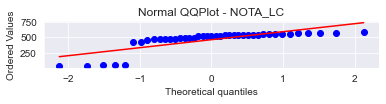

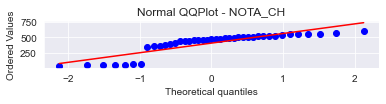

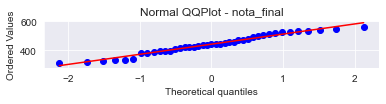

In [303]:
def qqplot(variavel):
    stats.probplot(notas_colegiox[variavel], dist = 'norm', plot = plt)
    plt.title(f'Normal QQPlot - {variavel}')
    plt.show()
    
plt.figure(1)
plt.subplot(4, 1, 1)
qqplot('NOTA_REDACAO')
plt.subplot(4, 1, 1)
qqplot('NOTA_MT')
plt.subplot(4, 1, 1)
qqplot('NOTA_CN')
plt.subplot(4, 1, 2)
qqplot('NOTA_LC')
plt.subplot(4, 1, 2)
qqplot('NOTA_CH')
plt.subplot(4, 1, 2)
qqplot('nota_final')

* Pelo fato de apenas a Nota de Redação seguir Distribuição Normal, a Correlação de Pearson deve ser utilizada, ao passo que as demais variáveis devem ser utilizadas com Correlação de Spearman

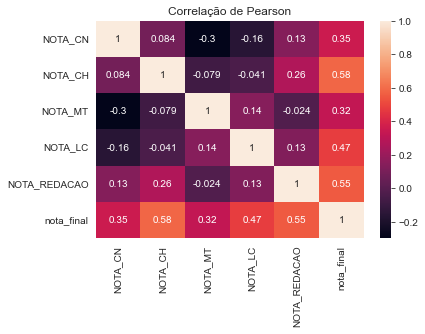

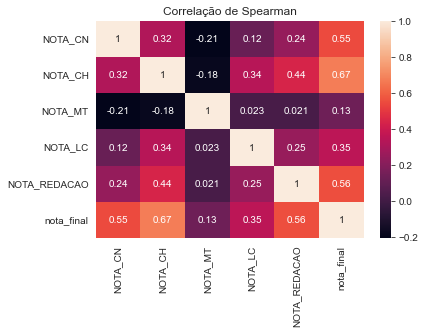

In [304]:
# Caso seja dados paramétricos
correlacoes = notas_colegiox.corr(method='pearson')
plt.figure()
sns.heatmap(correlacoes, annot = True)
plt.title('Correlação de Pearson')
plt.show()

# Caso seja dados não paramétricos
correlacoes = notas_colegiox.corr(method='spearman')
plt.figure()
sns.heatmap(correlacoes, annot = True)
plt.title('Correlação de Spearman')
plt.show()

### Análise de Outliers

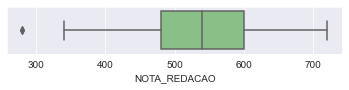

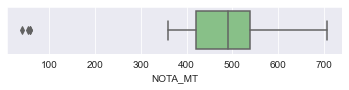

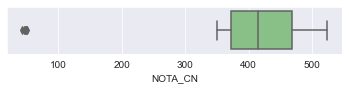

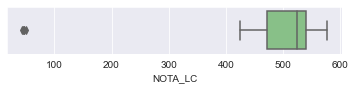

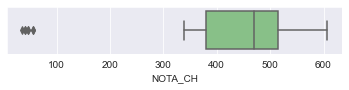

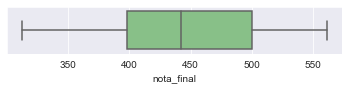

In [305]:
def boxplot_outliers(variavel):
    sns.boxplot(data = notas_colegiox, x=variavel)
    plt.show()

plt.figure(1)
plt.subplot(4, 1, 1)
boxplot_outliers('NOTA_REDACAO')
plt.subplot(4, 1, 1)
boxplot_outliers('NOTA_MT')
plt.subplot(4, 1, 1)
boxplot_outliers('NOTA_CN')
plt.subplot(4, 1, 2)
boxplot_outliers('NOTA_LC')
plt.subplot(4, 1, 2)
boxplot_outliers('NOTA_CH')
plt.subplot(4, 1, 2)
boxplot_outliers('nota_final')

* A melhor opção nesses casos é analisar esses Outliers e entender se com a retirada deles, a Distribuição passa a ser Normal; investigar o que houve com esses alunos, etc...

# <font color='red' style='font-size: 30px;'>2.0 Correlação de Spearman  </font>
<hr style='border: 2px solid red;'>

> CONSULTAR: 

https://universidadedosdados.medium.com/multicollinearity-is-not-correlation-38014cbfc710

## 2.1) O que é?

> 1. A correlação de Spearman avalia a relação monotônica entre duas variáveis contínuas ou ordinais. Em uma relação monotônica, as variáveis tendem a mudar juntas mas não necessariamente a uma taxa constante. O coeficiente de correlação de Spearman baseia-se nos valores classificados de cada variável, em vez de os dados brutos. 

> 2. A correlação de Spearman é muito usada para avaliar relações envolvendo variáveis ordinais. Por exemplo, você poderia usar a correlação de Spearman para avaliar se a ordem na qual os funcionários executam um teste está relacionada ao número de meses de emprego.

> 3. Gera um número que varia de -1 a +1. Quanto mais próximo dos extremos (-1 ou 1), maior é a força da correlação. Já os valores próximos de 0 implicam em correlações mais fracas ou inexistentes.

> 4. Medida de força da relação entre duas variáveis. Utiliza os postos de entradas de amostras de dados pareados.

> 5. Pode ser usado na relação de dados lineares e não lineares, assim como também para dados no nível ordinal.

> 6. É utilizado em dados não paramétricos.

## 2.2) Cálculo do Coeficiente de Spearman

<img src = './img193.png' width = '70%'>

# $$r_r = 1 - \frac {6{\sum_{i=1}^{n}}{d_i}^2} {n({n^2}-1)}$$

$n$ = número de amostras

$di$ = diferença de alcance de cada elemento


<img src = './img44.png' width = '70%'>

# <font color='red' style='font-size: 30px;'>3.0 Correlação de Kendall </font>
<hr style='border: 2px solid red;'>

> CONSULTAR: 

https://universidadedosdados.medium.com/multicollinearity-is-not-correlation-38014cbfc710

## 3.1) O que é? 

> 1. Teste não paramétrico indicado para número pequeno de amostras ou para populações com grandes quantidade de empates ( valores repetidos).

> 2. Pode ser utilizado juntamente com o Spearman para comparação.

> 3. É mais conservador que o teste de Spearman.

> 4. É utilizado para amostras com menos de 30 registros.

## 3.2) Cálculo do Coeficiente de Kendall

# $$ k = \frac {(c-nc)} {\frac {n(n-1)}{2}}$$

$c$ = qtd de paresconcordantes

$nc$ = qtd de pares não concordantes

> 1. Sendo concordantes: se xi > xj, então yi > yj 

> 2. Sendo não concordantes: se xi > xj, então yi < yj

<img src = './img45.png' width = '70%'>

# <font color='red' style='font-size: 30px;'>4.0 Regressão Linear   </font>
<hr style='border: 2px solid red;'>




<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
<i> Introdução sobre Conceitos de Regressão Linear.</i>     
</p>    


<hr>

> 1. Y e Ŷ (Y real e Y previsto, respectivamente).

## 4.1) Regressão Linear

> 1. A análise de regressão diz respeito ao estudo da dependência de uma variável (a variável dependente) em relação a uma ou mais variáveis, as variáveis explicativas ou independentes, visando estimar e/ou prever o valor médio da primeira em termos dos valores conhecidos ou fixados das segundas.

### 4.1.1) Terminologia

> 1. A variável que é prevista é conhecida como variável dependente (*Y*).

> 2. A variável utilizada para prever o valor da variável dependente é conhecida como variável independente (*X*).


### 4.1.2) Função consumo

> 1. Um economista famoso do passado concluiu em um de seus estudos que os indivíduos tendem a aumentar o seu consumo conforme sua renda aumenta. Logicamente esta teoria ganhou um pouco mais de complexidade, mas vamos utilizar sua forma mais simples para entender o procedimento de análise de regressão com a seguninte formulação:

# $$Y_i = \beta_1 + \beta_2X_i$$

Onde

- $Y_i$ é o gasto das famílias ou consumo das famílias

- $X_i$ é a renda disponível

- $\beta_1$ é conhecido como intercepto (no modelo teórico acima é conhecido como consumo autônomo, ou seja, o consumo quando o rendimento é zero)

- $\beta_2$ é o coefiente angular (no modelo teórico é a propensão marginal a consumir)

> 1. Em uma análise de regressão linear simples, o interesse está em estimar a função de regressão populacional como a apresentada acima, ou seja, estimar os valores dos parâmetros $\beta_1$ e $\beta_2$ com base nas observações de $Y$ e $X$.

### 4.1.3) Função de regressão populacional

> 1. A equação formulada acima é conhecida como **função de regressão populacional (FRP)** e em alguns livros é também representada da seguinte forma:

# $$E(Y|X_i) = \beta_1 + \beta_2X_i$$

> 2. Ela afirma que o valor esperado da distribuição de $Y$, dado $X_i$, tem uma relação funcional com $X_i$, isto é, a resposta média de $Y$ varia com $X$. O coeficientes $\beta_1$ e $\beta_2$ são conhecidos como coeficientes de regressão e também são conhecidos como intercepto e coeficiente angular, respectivamente.

<img src="https://caelum-online-public.s3.amazonaws.com/1273-estatistica-parte4/01/img027.png" width=50%>

> 3. O gráfico de dispersão acima deixa claro que com o aumento da renda familiar, em média, as despesas de consumo das famílias aumentam, mas não no mesmo nível. O que podemos dizer é que para um nível de renda $X_i$ as despesas médias de consumo de uma
família agrupam-se em torno do consumo médio de todas as famílias deste nível $X_i$, isto é, em torno de sua esperança condicional $E(Y|X_i)$. Portanto, podemos expressar o desvio individual de $Y_i$ em torno de seu valor esperado da seguinte forma:

# $$u_i = Y_i - E(Y|X_i)$$

> ou

# $$Y_i = E(Y|X_i) + u_i$$

> onde o desvio $u_i$ é uma variável aleatória não-observável que assume valores positivos ou negativos. Esta variável é também cohecida como termo de erro estocástico.

> Observe que a podemos representar a FRP em sua forma estocástica da seguinte maneira:

# $$Y_i = \beta_1 + \beta_2X_i + u_i$$


## 4.2) Resíduos 

> 1. Como vimos anteriormente, o resíduo da i-ésima observação é a diferença entre o valor observado de nossa variável dependente ($Y_i$) e o valor estimado da variável dependente ($\hat{Y}_i$).

# $$\hat{u}_i = Y_i - \hat{Y}_i$$

> 2. Em outras palavras, $\hat{u}_i$ é o erro obtido ao se utilizar a equação de regressão estimada para prever o valor da variável dependente.

## 4.3) Método dos Mínimos Quadrados

Considere a seguinte **função de regressão da população (FRP)** para duas variáveis:

# $$Y_i = \beta_1 + \beta_2X_i + u_i$$

Como a **FRP** não pode ser obtida de forma direta, precisamos estimá-la através da **função de regressão amostral (FRA)**.

# $$Y_i = \hat{\beta}_1 + \hat{\beta}_2X_i + \hat{u}_i$$
# $$Y_i = \hat{Y}_i + \hat{u}_i$$

onde $\hat{Y}_i$ é o valor estimado de $Y_i$.

A partir da equação acima podemos expressar o erro da seguinte maneira:

# $$\hat{u}_i = Y_i - \hat{Y}_i$$
# $$\hat{u}_i = Y_i - \hat{\beta}_1 - \hat{\beta}_2X_i$$

A ideia é determinar **FRA** de forma que fique o mais próximo possível do valor observado de $Y$. Intuitivamente uma forma interessante de fazer isso seria determinar **FRA** de maneira que a soma dos resíduos seja a menor possível.

# $$\sum\hat{u}_i = \sum{(Y_i - \hat{Y}_i)}$$

Avaliando a figura abaixo se pode verificar que talvez o critério de minimizar a soma dos resíduos não seja a melhor abordagem para solucionar o problema.

<img src="https://caelum-online-public.s3.amazonaws.com/1273-estatistica-parte4/01/img015.png" width=50%>

O critério de minimização da soma dos resíduos assume que todos os resíduos tem o mesmo peso no somatório, o que nem sempre se comprova. Em nosso exemplo os resíduos $\hat{u}_1$ e $\hat{u}_4$ encontram-se bem mais afastados da **FRA** que $\hat{u}_2$ e $\hat{u}_3$. Isso acarreta na possibilidade de que a soma dos $\hat{u}_i$'s seja bastante pequena e até mesmo nula, mesmo que os resíduos estejam muito dispersos em relação a reta de regressão.

Para evitar tal problema adotou-se o critério de minimização da soma dos quadrados dos resíduos que é conhecido como **Método de Mínimos Quadrados**.

# $$\sum\hat{u}_i^2 = \sum{(Y_i - \hat{Y}_i)^2}$$
# $$\sum\hat{u}_i^2 = \sum{(Y_i - \hat{\beta}_1 - \hat{\beta}_2X_i)^2}$$

Após um procedimento de diferenciação, algumas simplificações e manipulações algébricas obtemos os **estimadores de mínimos quadrados**. Beta2 é o coeficiente angular da reta e Beta1 é o coeficiente linear.

# $$ \boxed{\hat{\beta}_2 = \frac{n\sum{X_iY_i} - \sum{X_i}\sum{Y_i}}{n\sum{X_i^2} - (\sum{X_i})^2}} $$

# $$ \boxed{\hat{\beta}_1 = \frac{\sum{X_i^2}\sum{Y_i} - \sum{X_i}\sum{X_iY_i}}{n\sum{X_i^2} - (\sum{X_i})^2}} $$ 



## 4.4) No final, o que desejamos?

<img src = './img42.png' width = '70%'>

<img src = './img43.png' width = '70%'>

## 4.5) Coeficiente de Determinação Ajustado - R²

> 1. O coeficiente de determinação (R²) é uma medida resumida que diz quanto a linha de regressão ajusta-se aos dados. É um valor entre 0 e 1

> 2. Ele é a variação encontrada dividido pela variação total

$$R^2(y, \hat{y}) = 1 - \frac {\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}{\sum_{i=0}^{n-1}(y_i-\bar{y}_i)^2}$$

    > 1. Mostra o quanto o modelo consegue explicar os valores.

    > 2. Quanto maior, mais explicativo ele é.

    > 3. O restante da variabilidade está em variáveis não incluídas no modelo.

    > 4. Varia entre 0 e 1 (Sempre Positivo).

    > 5. Calcula-se com o quadrado do Coeficiente de Correlação (R)

## 4.6) Regressão Linear Múltipla

> 1. Utilizada quando usamos Duas ou Mais Variáveis Explanatórias/Independentes para Prever uma Variável Dependente.

> 2. Nem sempre ter mais Variáveis Explanatórias torna nosso Modelo melhor.

> 3. Analisar cada variável independente com y individualmente.

> 4. Gerar gráficos de dispersão individuais.

> 5. Buscar redundâncias (mesmos efeitos de x sobre y)

> 6. Lembrar do Coeficiente de Determinação, entretanto, quanto mais variáveis explanatórias, maior a tendência de R² aumentar; portanto, deve-se utilizar o R² ajustado, pois ele ajusta a variação do modelo de acordo com o número de variáveis independentes.

> 7. Eliminar Multicolinearidade: Quando duas variáveis independentes são correlacionadas, incluí-las pode prejudicar o modelo, criando previsões não confiáveis.

> 8. Eliminar Parcimônia: Não colocar variáveis que não melhorem o modelo em nada.

> 9. Fórmula Geral

<img  src='reg_01.jpg' width='600px'>


### 2.5.2) Interpretação dos Coeficientes Estimados

<img  src='reg_02.jpg' width='600px'>

## 4.7) Outras Métricas de Regressão

Algumas estatísticas obtidas do modelo de regressão são muito úteis como critério de comparação entre modelos estimados e de seleção do melhor modelo, as principais métricas de regressão que o scikit-learn disponibiliza para modelos lineares são as seguintes:

### 4.7.1) Erro Quadrático Médio

> 1. Média dos quadrados dos erros. Ajustes melhores apresentam $EQM$ mais baixo.

$$EQM(y, \hat{y}) = \frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2$$

### 4.7.2) Raíz do Erro Quadrático Médio

> 2. Raíz quadrada da média dos quadrados dos erros. Ajustes melhores apresentam $\sqrt{EQM}$ mais baixo.

$$\sqrt{EQM(y, \hat{y})} = \sqrt{\frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}$$


## 4.8) Outliers

> 1. Analisar a Variável Dependente e as Variáveis Independentes e medir a Correlação entre elas para compreender o que faz a Variável Dependente aumentar tanto

> 2. Após isso, avaliar se há necessidade de retirar o Outlier ou não. De preferência, não devemos tirar pois eles nos trazem dados importantes, contudo, caso tiremos, devemos sempre documentar nossas decisões

## 4.9) Extrapolação

> 1. A extrapolação ocorre quando temos dados fora dos Limites da Regressão. Supondo que nossa Variável Independente seja Idade e a Variável Dependente Custo. Temos o Custo para as Idades em um Intervalo de [18, 63].

> 2. Matematicamente, se extrapolarmos esses limites a Regressão funcionará, entretanto, não sabemos com certeza se a relação continuará se comportando de maneira Linear. 

> 3. Como solução, teremos de entender nosso Modelo de Negócio. Não faz sentido prever o Custo de um paciente com 140 anos de Idade, embora Matematicamente fosse possível.


## 4.10) Condições Para Regressão Linear

> 1. Residuais próximos de uma Distribuição Normal. Podemos conferir utilizando Histogramas, Diagramas de Normalidade, Testes de Shapiro-Wilk, Kolmogorov e Anderson.

## 4.11) Exemplo

## Consultar o Exemplo de Correlação

In [306]:
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

In [307]:
regressao = smf.ols('nota_final ~ NOTA_REDACAO', data = notas_colegiox).fit()
print(regressao.summary())

                            OLS Regression Results                            
Dep. Variable:             nota_final   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.286
Method:                 Least Squares   F-statistic:                     17.02
Date:                Fri, 01 Jul 2022   Prob (F-statistic):           0.000188
Time:                        00:16:51   Log-Likelihood:                -223.52
No. Observations:                  41   AIC:                             451.0
Df Residuals:                      39   BIC:                             454.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      251.6789     47.319      5.319   

* R-Squared e Adj. R-Squared: É o $R^2$ e o $R^2 Ajustado$. Eles explicam que 30% e 28% dos dados explicam essa relação/correlação linear dessas grandezas, respectivamente.

* F-statistic é utilizado para testar simultaneamente a significância de um conjunto de parâmetros. O Prob (F-statistic) não pode passar de 0.05 em modelos com 95% de confiança assumidos.

* O t é utilizado para testar a significância de cada parâmetro individualmente.

* O P>|t| funciona de maneira análoga. Ele não pode passar de 0.05.

* coef: Intercept (coeficiente linear) = 251.6789 e NOTA_REDACAO (coeficiente angular) = 0.3627 são nossos coeficientes da regressão.





In [308]:
coefs = pd.DataFrame(regressao.params)
coefs.columns = ['Coeficientes']
print(coefs)
print()
print(f'Intercepto (Coeficiente Linear): {regressao.params[0]}, Coeficiente Linear: {regressao.params[1]}')
print()
print('Exemplo de Equação de Regressão para um Aluno que tirou 540 na Nota de Redação: nota_final = 251.678855+ 0.362749 *[NOTA_REDACAO]')
print()

print('Valores Verdadeiros')
display(notas_colegiox.head())
print()

print('Prevendo a Nota Final para cada aluno de acordo com a Nota de Redação')
print(np.array(regressao.predict()))
print()

print('Analisando os resíduos da Regressão para cada aluno de acordo com a Nota de Redação')
residuos = regressao.resid 
print(np.array(residuos))


              Coeficientes
Intercept       251.678855
NOTA_REDACAO      0.362749

Intercepto (Coeficiente Linear): 251.67885527502278, Coeficiente Linear: 0.3627491659152394

Exemplo de Equação de Regressão para um Aluno que tirou 540 na Nota de Redação: nota_final = 251.678855+ 0.362749 *[NOTA_REDACAO]

Valores Verdadeiros


,NOTA_CN,NOTA_CH,NOTA_MT,NOTA_LC,NOTA_REDACAO,nota_final
37,46.3,447.2,537.1,557.3,340.0,385.58
44,505.9,534.5,451.9,529.8,720.0,548.42
52,449.4,436.4,506.4,45.8,560.0,399.60
65,468.6,606.1,59.5,576.6,520.0,446.16
79,414.3,553.7,510.6,49.5,640.0,433.62



Prevendo a Nota Final para cada aluno de acordo com a Nota de Redação
[375.01357169 512.85825473 454.81838819 440.30842155 483.83832146
 382.268555   498.3482881  454.81838819 469.32835482 440.30842155
 447.56340487 433.05343823 491.09330478 353.24862173 440.30842155
 411.28848828 425.79845491 440.30842155 425.79845491 447.56340487
 491.09330478 491.09330478 447.56340487 491.09330478 440.30842155
 469.32835482 469.32835482 396.77852164 447.56340487 425.79845491
 396.77852164 469.32835482 454.81838819 433.05343823 440.30842155
 353.24862173 469.32835482 447.56340487 440.30842155 396.77852164
 476.58333814]

Analisando os resíduos da Regressão para cada aluno de acordo com a Nota de Redação
[  10.56642831   35.56174527  -55.21838819    5.85157845  -50.21832146
   39.811445     36.5317119    63.92161181   57.25164518 -127.62842155
  -22.08340487  -42.65343823   17.60669522   87.57137827   55.45157845
  -68.44848828   86.50154509   18.77157845   27.62154509  -30.50340487
  -45.83330478  -

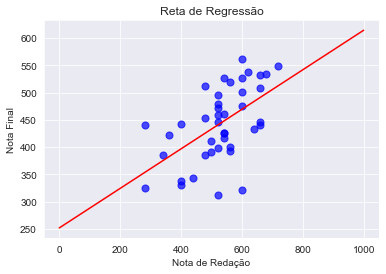

In [309]:
# s -> tamanho do ponto
# alpha -> intensidade da cor
plt.scatter(y = notas_colegiox.nota_final, x = notas_colegiox.NOTA_REDACAO, color = 'blue', s = 50, alpha = 0.7)
# x_plot = np.linspace(min(notas_colegiox.NOTA_REDACAO), max(notas_colegiox.NOTA_REDACAO), len(notas_colegiox.NOTA_REDACAO))
x_plot = np.linspace(0, 1000)
plt.plot(x_plot, x_plot*regressao.params[1]+regressao.params[0], color = 'r')
plt.title('Reta de Regressão')
plt.ylabel('Nota Final')
plt.xlabel('Nota de Redação')
plt.show()

## Teste de Normalidade dos Resíduos

> 1. Se os resíduos não tiverem Normalidade, a Regressão Linear não é válida.

In [310]:
# Resíduos da Nota de Redação
print(stats.shapiro(residuos))
if stats.shapiro(residuos)[1] > 0.05:
    print('Os Resíduos seguem uma Distribuição Normal')
else:
    print('Os Resíduos não seguem uma Distribuição não é Normal')

ShapiroResult(statistic=0.9587120413780212, pvalue=0.1417609006166458)
Os Resíduos seguem uma Distribuição Normal


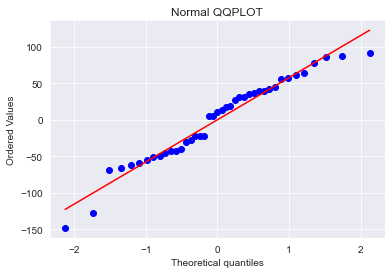

In [311]:
stats.probplot(residuos, dist = 'norm', plot = plt)
plt.title('Normal QQPLOT')
plt.show()

## Análise de Homocedasticidade dos resíduos (Os resíduos devem ter variância constante)

> 1. Homocedasticidade é o termo para designar variância constante dos erros/ resíduos para observações distintas (Xij). Caso a suposição de homocedasticidade não seja válida, podemos dizer que:

> 2. Os erros padrões dos estimadores, obtidos pelo Método dos Mínimos Quadrados, são incorretos e portanto a inferência estatística não é válida.
Não podemos mais dizer que os Estimadores de Mínimos Quadrados são os melhores estimadores de mínima variância para β.
Quando não há variação constante, temos o problema de heterocedasticidade, ou seja, a variância dos erros será diferente para cada valor condicional de X.

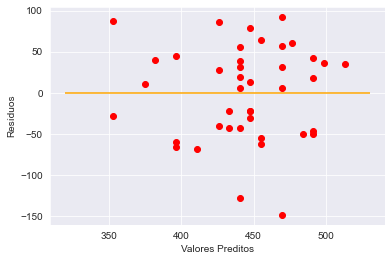

In [312]:
plt.scatter(y = residuos, x = regressao.predict(), color = 'red')
plt.hlines(y = 0, xmin = 320, xmax = 530, color = 'orange')
plt.ylabel('Resíduos')
plt.xlabel('Valores Preditos')
plt.show()

* Note que a dispersão dos dados forma um retângulo. Devemos sempre ter um retângulo formato, seja ele inclinado ou não.

## 4.12) Exemplo Sklearn

In [313]:
notas_colegiox.head()

,NOTA_CN,NOTA_CH,NOTA_MT,NOTA_LC,NOTA_REDACAO,nota_final
37,46.3,447.2,537.1,557.3,340.0,385.58
44,505.9,534.5,451.9,529.8,720.0,548.42
52,449.4,436.4,506.4,45.8,560.0,399.60
65,468.6,606.1,59.5,576.6,520.0,446.16
79,414.3,553.7,510.6,49.5,640.0,433.62


In [314]:
x = notas_colegiox.iloc[:, 4].values
print(x)
print()
y = notas_colegiox.iloc[:, 5].values
print(y)

[340. 720. 560. 520. 640. 360. 680. 560. 600. 520. 540. 500. 660. 280.
 520. 440. 480. 520. 480. 540. 660. 660. 540. 660. 520. 600. 600. 400.
 540. 480. 400. 600. 560. 500. 520. 280. 600. 540. 520. 400. 620.]

[385.58 548.42 399.6  446.16 433.62 422.08 534.88 518.74 526.58 312.68
 425.48 390.4  508.7  440.82 495.76 342.84 512.3  459.08 453.42 417.06
 445.26 440.76 526.08 533.16 397.8  500.36 321.2  337.22 461.46 385.46
 330.92 474.88 392.82 411.56 479.46 325.22 561.26 425.4  471.8  442.16
 537.54]


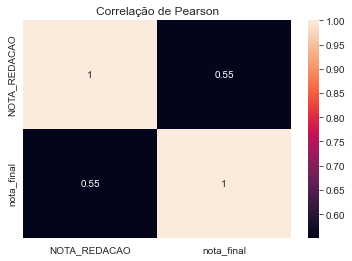

In [315]:
correlacao2 = notas_colegiox[['NOTA_REDACAO', 'nota_final']].corr(method='pearson')
plt.figure()
sns.heatmap(correlacao2, annot = True)
plt.title('Correlação de Pearson')
plt.show()

In [316]:
x = x.reshape(-1,1) # Transformando em Matriz
print(x)

[[340.]
 [720.]
 [560.]
 [520.]
 [640.]
 [360.]
 [680.]
 [560.]
 [600.]
 [520.]
 [540.]
 [500.]
 [660.]
 [280.]
 [520.]
 [440.]
 [480.]
 [520.]
 [480.]
 [540.]
 [660.]
 [660.]
 [540.]
 [660.]
 [520.]
 [600.]
 [600.]
 [400.]
 [540.]
 [480.]
 [400.]
 [600.]
 [560.]
 [500.]
 [520.]
 [280.]
 [600.]
 [540.]
 [520.]
 [400.]
 [620.]]


In [317]:
from sklearn.linear_model import LinearRegression
regressao2 = LinearRegression()
regressao2.fit(x, y)

# Intercepto
print(f'Intercepto: {regressao2.intercept_}')

# Coeficiente
print(f'Coeficiente Angular: {regressao2.coef_}')

# Coeficiente de Determinação R^2
print(f'Coeficiente de Determinação - R^2: {regressao2.score(x, y)}')

Intercepto: 251.6788552750226
Coeficiente Angular: [0.36274917]
Coeficiente de Determinação - R^2: 0.30384384379611706


In [318]:
# Previsões
previsoes = regressao2.predict(x)
print(previsoes)

print()

# Previsões Aleatórias

previsao = regressao2.predict([[820]])
print(previsao)



[375.01357169 512.85825473 454.81838819 440.30842155 483.83832146
 382.268555   498.3482881  454.81838819 469.32835482 440.30842155
 447.56340487 433.05343823 491.09330478 353.24862173 440.30842155
 411.28848828 425.79845491 440.30842155 425.79845491 447.56340487
 491.09330478 491.09330478 447.56340487 491.09330478 440.30842155
 469.32835482 469.32835482 396.77852164 447.56340487 425.79845491
 396.77852164 469.32835482 454.81838819 433.05343823 440.30842155
 353.24862173 469.32835482 447.56340487 440.30842155 396.77852164
 476.58333814]

[549.13317133]


## 4.13) Métricas

> 1. Y e Ŷ (Y real e Y previsto, respectivamente).

#### <font color=green> Erro Médio Absoluto - (MAE)</font>
***
> 1. O erro médio absoluto, MAE (da sigla em inglês Mean Absolute Error), é calculado a partir da média dos erros absolutos.

> 2. Utilizamos o módulo de cada erro para evitar a subestimação, pois, o valor é menos afetado por outliers.

> 3. Quanto menor, melhor.

> 4. Cada erro, pode ser interpretado como a diferença entre Y e Ŷ e assim, temos:

# $$MAE = \frac {\sum{|Y_i - \hat{Y_i}|} } {n} $$

> 5. Utilizamos essa medida em séries temporais, pois há casos em que o erro negativo pode zerar o positivo ou dar uma ideia de que o modelo é preciso. Mas aqui, medimos apenas a distância do valor real, independente de ser acima ou abaixo.

#### <font color=green> Erro Quadrático Médio - (MSE)</font>
***
> 1. O erro quadrático médio, MSE (da sigla em inglês Mean Squared Error), é comumente usado para verificar a acurácia de modelos e dá um maior peso aos maiores erros, já que, ao ser calculado, cada erro é elevado ao quadrado individualmente e, após isso, a média desses erros quadráticos é calculada.

> 2. Por conta do expoente ao quadrado que o erro assume, essa métrica é bastante sensível a outliers (valores discrepantes) e, caso tenha muitos erros significativos em sua análise, essa métrica poderá ser extrapolada.


> 3. Quanto menor, melhor.

> 4. Cada erro, pode ser interpretado como a diferença entre Y e Ŷ e assim, temos:

# $$MSE = \frac {\sum{(Y_i - \hat{Y_i})^2} } {n} $$


#### <font color=green> Raiz do Erro Quadrático Médio - (RMSE) </font>
> 1. A raiz quadrada do erro médio, RMSE (da sigla em inglês Root Mean Squared Error) é apenas a raiz quadrada do MSE, onde o erro retorna à unidade de medida do modelo (no MSE, a unidade de medida é quadrática).

> 2. Quanto menor, melhor.

> 3. A equação para cálculo, dá-se por:

# $$RMSE = \sqrt{\frac {\sum{(Y_i - \hat{Y_i})^2} } {n}} $$

> 4. É frequentemente usada em séries temporais por ser mais sensível a erros maiores devido ao processo de quadratura que a produziu.

#### <font color=green> Média Percentual Absoluta do Erro - (MAPE) </font>
> 1. Esta é outra métrica interessante para usar, geralmente usada em relatórios de gerenciamento, porque o erro é medido como uma porcentagem e assim, é possível fazer comparações entre erros percentuais do modelo entre produtos.

> 2. Quanto menor, melhor.

> 3. A fórmula para cálculo é a seguinte:

# $$MAPE = {\frac {1} {n}} ({\sum {\frac {|Y_i - \hat{Y_i}|}{Y_i}}) {.100}} $$



In [319]:
from sklearn.metrics import mean_absolute_error


print('MAE')
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
print(f'MAE = {mean_absolute_error(y_true, y_pred)}')
print()

from sklearn.metrics import mean_squared_error
print('MSE')
y_true = [[0.5, 1],[-1, 1],[7, -6]]
y_pred = [[0, 2],[-1, 2],[8, -5]]
print(f'MSE = {mean_squared_error(y_true, y_pred, squared=True)}')
print()

print('RMSE')
y_true = [[0.5, 1],[-1, 1],[7, -6]]
y_pred = [[0, 2],[-1, 2],[8, -5]]
print(f'RMSE = {mean_squared_error(y_true, y_pred, squared=False)}')
print()

from sklearn.metrics import mean_absolute_percentage_error
print('MPE')
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
print(f'MEP = {mean_absolute_percentage_error(y_true, y_pred)}')

MAE
MAE = 0.5

MSE
MSE = 0.7083333333333334

RMSE
RMSE = 0.8227486121839513

MPE
MEP = 0.3273809523809524


## 4.14) Tipos de Regressão

<img src = './img50.png' width='70%'>

## 4.15) Aplicação de Regressão Linear Simples

> 1. Este projeto tem como objetivo estudar a Deformação de uma Mola com base na Força que aplicamos sobre ela.

<img src = './img51.png' width = '70%'>

### 4.15.1) Análise e Tratamento dos Dados

* Importando dados

In [320]:
# Importando dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

mola = pd.read_csv('rigidez.csv', sep = ';', encoding = 'iso-8859-1')
print(mola.shape)
print(mola.dtypes)
mola.head()

(30, 6)
cargas      int64
forca     float64
Lo        float64
L         float64
x         float64
K         float64
dtype: object


,cargas,forca,Lo,L,x,K
0,1,0.10,27.0,29.90,0.0029,34.48
1,2,0.15,27.0,31.30,0.0043,34.88
2,3,0.18,27.0,NaN,NaN,NaN
3,4,0.23,27.0,34.00,0.0070,32.86
4,5,0.31,27.0,35.53,0.0085,36.34


* Renomeando Colunas e Excluindo uma variável

In [321]:
# Renomeando Colunas
mola.rename({
    'Lo':'comprimento_inicial',
    'L':'comprimento_final',
    'x':'deformacao',
    'K':'constante_de_deformacao'
}, axis = 1, inplace = True)
display(mola.head(2))

# Excluindo uma variável

mola1 = mola.drop(['comprimento_inicial'], axis = 1)
mola1.head(2)

,cargas,forca,comprimento_inicial,comprimento_final,deformacao,constante_de_deformacao
0,1,0.10,27.0,29.9,0.0029,34.48
1,2,0.15,27.0,31.3,0.0043,34.88


,cargas,forca,comprimento_final,deformacao,constante_de_deformacao
0,1,0.10,29.9,0.0029,34.48
1,2,0.15,31.3,0.0043,34.88


* Estatística Descritiva

In [322]:
# Estatística Descritiva
mola1.describe()

,cargas,forca,comprimento_final,deformacao,constante_de_deformacao
count,30.000000,30.000000,29.000000,29.000000,29.000000
mean,15.500000,1.519000,139.050690,0.112050,30.823448
std,8.803408,0.978103,343.474372,0.343475,5.840459
min,1.000000,0.100000,29.900000,0.002900,1.640000
25%,8.250000,0.690000,50.000000,0.023000,30.770000
50%,15.500000,1.450000,76.400000,0.049400,31.300000
75%,22.750000,2.235000,99.740000,0.072740,32.860000
max,30.000000,3.200000,1918.000000,1.891000,36.340000


* Retirando Dados Missing

In [323]:
# Retirando Dados Missing
display(mola1.isnull().sum())
print()
mola1['comprimento_final'].fillna(mola1['comprimento_final'].median(), inplace = True)
mola1['deformacao'].fillna(mola1['deformacao'].mean(), inplace = True)
mola1['constante_de_deformacao'].fillna(mola1['constante_de_deformacao'].mode()[0], inplace = True)

display(mola1.isnull().sum())
print()

display(mola1.head())

cargas                     0
forca                      0
comprimento_final          1
deformacao                 1
constante_de_deformacao    1
dtype: int64

cargas                     0
forca                      0
comprimento_final          0
deformacao                 0
constante_de_deformacao    0
dtype: int64

,cargas,forca,comprimento_final,deformacao,constante_de_deformacao
0,1,0.10,29.90,0.00290,34.48
1,2,0.15,31.30,0.00430,34.88
2,3,0.18,76.40,0.11205,30.81
3,4,0.23,34.00,0.00700,32.86
4,5,0.31,35.53,0.00850,36.34


* Análise dos Outliers e Remoção de Outliers

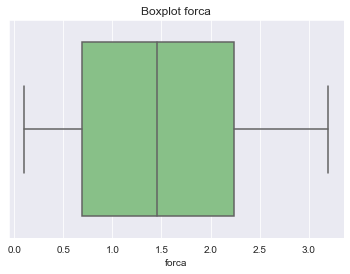

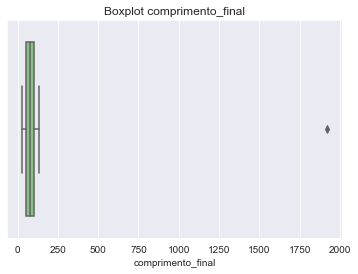

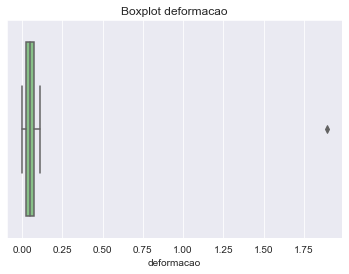

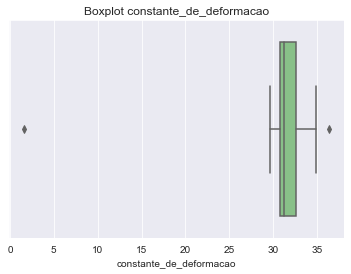

,cargas,forca,comprimento_final,deformacao,constante_de_deformacao
0,1,0.10,29.90,0.00290,34.48
1,2,0.15,31.30,0.00430,34.88
2,3,0.18,76.40,0.11205,30.81
3,4,0.23,34.00,0.00700,32.86
5,6,0.45,41.40,0.01440,31.25
6,7,0.55,44.20,0.01720,31.98
7,8,0.68,47.20,0.02020,33.66
8,9,0.72,50.00,0.02300,31.30
9,10,0.83,51.90,0.02490,33.33
10,11,1.05,58.00,0.03100,33.87


<Figure size 432x288 with 0 Axes>

In [324]:
# Análise dos Outliers
def plota_boxplot(df, variavel):
    sns.boxplot(data = df, x = variavel)
    plt.title(f'Boxplot {variavel}')
    plt.xlabel(variavel)
    plt.show()

variaveis = list(mola1.columns[1:])
i = 1
for variavel in variaveis:
    plota_boxplot(mola1, variavel)
    plt.tight_layout()
    i = i + 1

# Removendo Outliers
def retira_outliers(df):
    variaveis = list(df.columns[2:])
    i = 1
    remove_outliers = []
    for variavel in variaveis:
        Q1, Q2, Q3 = df[variavel].quantile([0.25, 0.5, 0.75])
        IIQ = Q3-Q1
        outliers_inferiores = Q1 - (1.5*IIQ)
        outliers_superioes = Q3 + (1.5*IIQ)
        outliers = df.loc[ (df[variavel] > outliers_superioes)][variavel] # (df[variavel] < outliers_inferiores) |
        outliers = ((dict(outliers)).keys())
        remove_outliers.append(outliers)
        i = i + 1
    remove_outliers = [list(i) for i in remove_outliers]
    index = []
    for i in remove_outliers:
        for j in i:
            index.append(j)
    return list(set(index))

mola1.drop(retira_outliers(mola1), inplace = True)
mola1

### 4.15.2) Análise da Correlação 

* Análise de Gráficos de Dispersão

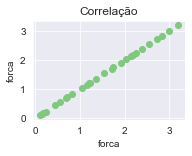

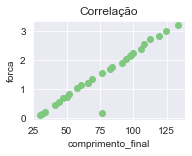

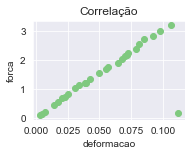

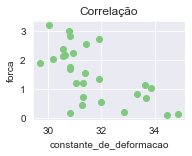

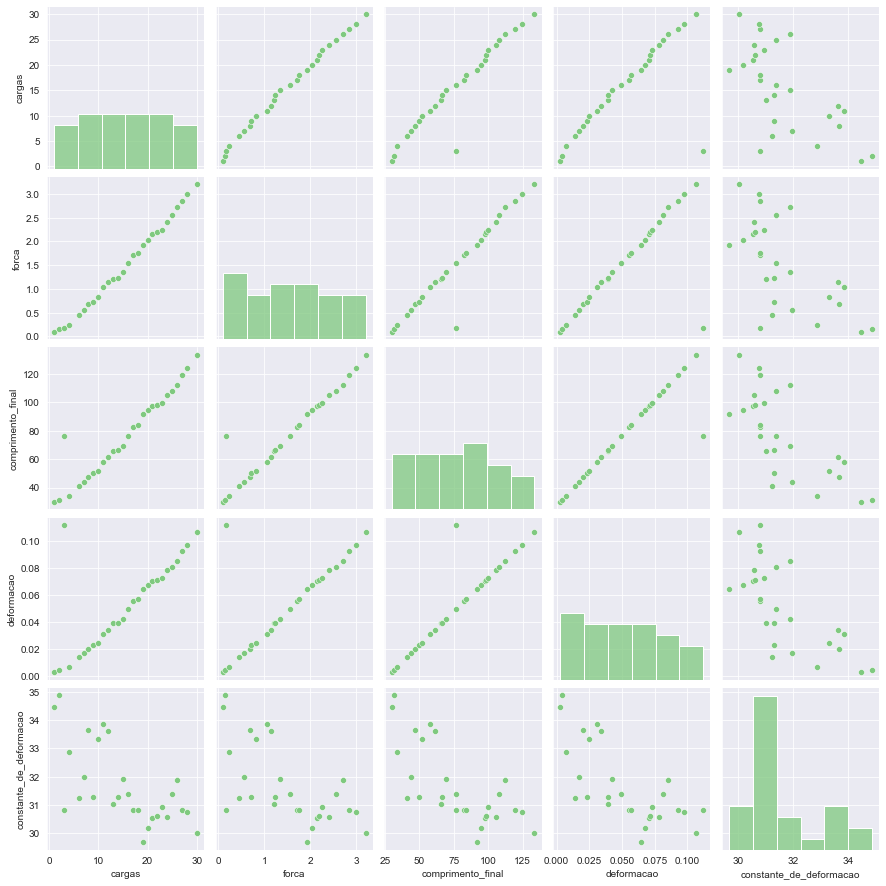

In [325]:
# Analisando o gráfico de dispersão I

def plota_dispersao(data, x, y):
    plt.scatter(data = data, x = x, y =y)
    plt.title('Correlação')
    plt.xlabel(f'{x}')
    plt.ylabel(f'{y}')
    plt.grid(True)
    plt.show()

variaveis = mola1.columns[1:]
i = 0
for variavel in variaveis:
    i = i + 1
    plt.figure()
    plt.subplot(2, 2, i)
    plota_dispersao(mola1, variavel, 'forca')

sns.pairplot(mola1);


* Análise de Normalidade para identificar a Correlação correta.

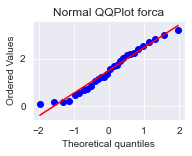

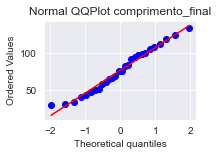

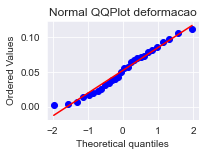

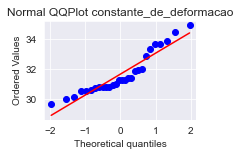

In [326]:
def analisa_normalidade_graficamente(data, variavel):
    stats.probplot(data[variavel], dist = 'norm', plot = plt)
    plt.title(f'Normal QQPlot {variavel}')
    plt.show()

variaveis = mola1.columns[1:]
i = 0
for variavel in variaveis:
    i = i + 1
    plt.figure()
    plt.subplot(2, 2, i)
    analisa_normalidade_graficamente(mola1, variavel)


In [327]:
import statsmodels
from statsmodels.stats.diagnostic import lilliefors
def analisa_normalidade_matematicamente(data, variavel):
    estatistica, p_value = stats.shapiro(data[variavel])
    if p_value > 0.05:
        print(f'Shapiro Wilk {variavel}: {round(p_value, 3)} -> Distribuição Normal')
        print()
    else:
        print(f'Shapiro Wilk {variavel}: {round(p_value, 3)} -> Distribuição Não é Normal')
        print()

    estatistica, p_value = statsmodels.stats.diagnostic.lilliefors(data[variavel])
    if p_value > 0.05:
        print(f'Kolmogorov {variavel}: {round(p_value, 3)} -> Distribuição Normal')
        print()
    else:
        print(f'Kolmogorov {variavel}: {round(p_value, 3)} -> Distribuição Não é Normal')
        print()


variaveis = mola1.columns[1:]
i = 0
for variavel in variaveis:
    i = i + 1
    analisa_normalidade_matematicamente(mola1, variavel)

Shapiro Wilk forca: 0.286 -> Distribuição Normal

Kolmogorov forca: 0.858 -> Distribuição Normal

Shapiro Wilk comprimento_final: 0.511 -> Distribuição Normal

Kolmogorov comprimento_final: 0.856 -> Distribuição Normal

Shapiro Wilk deformacao: 0.402 -> Distribuição Normal

Kolmogorov deformacao: 0.817 -> Distribuição Normal

Shapiro Wilk constante_de_deformacao: 0.006 -> Distribuição Não é Normal

Kolmogorov constante_de_deformacao: 0.002 -> Distribuição Não é Normal



* Correlação de Pearson

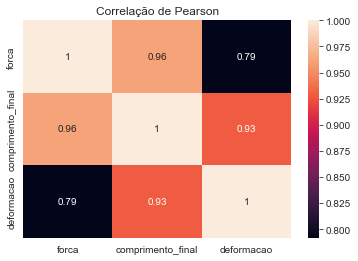

In [328]:
def correlacao_pearson(data):
    correlacao = data.corr(method='pearson')
    plt.figure()
    sns.heatmap(correlacao, annot = True)
    plt.title('Correlação de Pearson')
    plt.show()

correlacao_pearson(mola1[['forca', 'comprimento_final', 'deformacao']])



### 4.15.3) Regressão Linear (Houve algum erro na modelagem, mas considerar as variáveis normais)

* Criação do Modelo

In [329]:
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

regressao = smf.ols('forca ~ deformacao', data = mola1).fit()

residuos = regressao.resid 
residuos

0    -0.260916
1    -0.243416
2    -2.714772
3    -0.226095
5    -0.177883
6    -0.142883
7    -0.082527
8    -0.107527
9    -0.041635
10    0.036757
11    0.062470
12    0.011040
13    0.024076
14    0.074432
15    0.109609
16    0.128001
17    0.137822
18    0.124427
19    0.177105
20    0.222105
21    0.236569
22    0.267783
23    0.284067
24    0.371388
25    0.446208
26    0.409064
27    0.442991
29    0.431739
dtype: float64

* Teste de Normalidade dos Resíduos

In [330]:
estatistica, p_value = stats.shapiro(residuos)

if (estatistica > 0.05) and (p_value > 0.05):
    print(f'Shapiro Estatistica de Teste: {estatistica} --> Resíduos seguem Distribuição Normal')
    print(f'Shapiro p_value: {p_value} --> Resíduos seguem Distribuição Normal')
else:
    print(f'Shapiro Estatistica de Teste: {estatistica} --> Resíduos não seguem Distribuição Normal')
    print(f'Shapiro p_value: {p_value} --> Resíduos não seguem Distribuição Normal')


Shapiro Estatistica de Teste: 0.5360602140426636 --> Resíduos não seguem Distribuição Normal
Shapiro p_value: 2.7415667958052836e-08 --> Resíduos não seguem Distribuição Normal


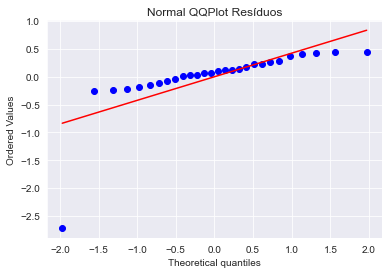

In [331]:
stats.probplot(residuos, dist = 'norm', plot = plt)
plt.title(f'Normal QQPlot Resíduos')
plt.show()

* Análise da Homocedasticidade dos Resíduos

> 1. Deveria formar um retângulo para que haja Homocedasticidade

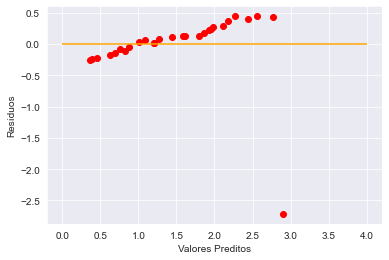

In [332]:
plt.scatter(y = residuos, x = regressao.predict(), color = 'red')
plt.hlines( y = 0, xmin = 0, xmax = 4, color = 'orange')
plt.ylabel('Resíduos')
plt.xlabel('Valores Preditos')
plt.show()

> 2. Teste de Breusch-Pagan 

H0: Existe Homocedasticidade : p_value > 0.05

h1: Não existe Homocedasticidade : p_value <= 0.05




In [333]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
estatistica, p_value, f_value, fp_value = sms.het_breuschpagan(regressao.resid, regressao.model.exog)
print(f'Estatística de Teste: {estatistica}')
print(f'p_value: {p_value}')
print(f'Estatística de Teste: {f_value}')
print(f'Estatística de Teste: {fp_value}')

Estatística de Teste: 4.37162945131943
p_value: 0.03654203284353193
Estatística de Teste: 4.81041913153221
Estatística de Teste: 0.0374282494818778


* Análise de Outliers nos Resíduos

In [334]:
outliers = regressao.outlier_test()

print(outliers.max())
print()
print(outliers.min())

student_resid    0.798202
unadj_p          0.985042
bonf(p)          1.000000
dtype: float64

student_resid   -7.156019e+01
unadj_p          1.908239e-30
bonf(p)          5.343068e-29
dtype: float64


* Modelo Aprovado --> Houve erros na modelagem, mas considerar que deu tudo certo para fins didáticos  

In [335]:
print(regressao.summary())

                            OLS Regression Results                            
Dep. Variable:                  forca   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     43.69
Date:                Fri, 01 Jul 2022   Prob (F-statistic):           5.20e-07
Time:                        00:17:02   Log-Likelihood:                -23.638
No. Observations:                  28   AIC:                             51.28
Df Residuals:                      26   BIC:                             53.94
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2936      0.214      1.372      0.1

Intercept      0.293593
deformacao    23.214516
dtype: float64




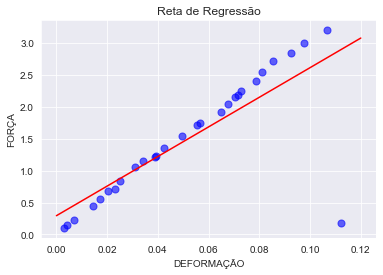

In [336]:
print(regressao.params)
print()
regressao.predict()
print()
plt.scatter(y = mola1.forca, x = mola1.deformacao, color = 'blue', s = 50, alpha = 0.6)
x_plot = np.linspace(0, 0.12)
plt.plot(x_plot, x_plot*regressao.params[1] + regressao.params[0], color = 'r')
plt.title('Reta de Regressão')
plt.ylabel('FORÇA')
plt.xlabel('DEFORMAÇÃO')
plt.show()

* Regressão com SKLearn 

In [337]:
mola1.head()

,cargas,forca,comprimento_final,deformacao,constante_de_deformacao
0,1,0.10,29.9,0.00290,34.48
1,2,0.15,31.3,0.00430,34.88
2,3,0.18,76.4,0.11205,30.81
3,4,0.23,34.0,0.00700,32.86
5,6,0.45,41.4,0.01440,31.25


In [338]:
x = mola1.iloc[:, 3].values
print(x)
y = mola1.iloc[:, 1].values 
print(y)

correlacao2 = np.corrcoef(x, y)
correlacao2

x = x.reshape(-1, 1)
print(x)

[0.0029     0.0043     0.11204966 0.007      0.0144     0.0172
 0.0202     0.023      0.0249     0.031      0.0342     0.039
 0.0393     0.0423     0.0494     0.0555     0.0568     0.0647
 0.0676     0.0704     0.0715     0.07274    0.0785     0.0812
 0.0853     0.0925     0.0975     0.1066    ]
[0.1  0.15 0.18 0.23 0.45 0.55 0.68 0.72 0.83 1.05 1.15 1.21 1.23 1.35
 1.55 1.71 1.75 1.92 2.04 2.15 2.19 2.25 2.4  2.55 2.72 2.85 3.   3.2 ]
[[0.0029    ]
 [0.0043    ]
 [0.11204966]
 [0.007     ]
 [0.0144    ]
 [0.0172    ]
 [0.0202    ]
 [0.023     ]
 [0.0249    ]
 [0.031     ]
 [0.0342    ]
 [0.039     ]
 [0.0393    ]
 [0.0423    ]
 [0.0494    ]
 [0.0555    ]
 [0.0568    ]
 [0.0647    ]
 [0.0676    ]
 [0.0704    ]
 [0.0715    ]
 [0.07274   ]
 [0.0785    ]
 [0.0812    ]
 [0.0853    ]
 [0.0925    ]
 [0.0975    ]
 [0.1066    ]]


In [339]:
from sklearn.linear_model import LinearRegression
regressao2 = LinearRegression()
regressao2.fit(x, y)

print(regressao2.intercept_)
print(regressao2.coef_)
print(f'Coeficiente de Determinação R^2: {regressao2.score(x, y)}')

0.2935934756094454
[23.2145163]
Coeficiente de Determinação R^2: 0.6269176058615684


In [340]:
previsoes = regressao2.predict(x)
previsoes

array([0.36091557, 0.3934159 , 2.89477202, 0.45609509, 0.62788251,
       0.69288316, 0.7625267 , 0.82752735, 0.87163493, 1.01324348,
       1.08752993, 1.19895961, 1.20592397, 1.27556752, 1.44039058,
       1.58199913, 1.612178  , 1.79557268, 1.86289478, 1.92789542,
       1.95343139, 1.98221739, 2.11593301, 2.1786122 , 2.27379172,
       2.44093623, 2.55700882, 2.76826091])

In [341]:
previsao = regressao2.predict([[0.06]])
print(f'A força deve ser de {previsao} N')

A força deve ser de [1.68646445] N


## 4.16) Aplicação de Regressão Linear Multivariada:

> 1. Relação Linear entre as variáveis independentes e dependentes.

> 2. Sem presença de Outliers na Análise dos Resíduos.

> 3. Passar no teste de Homocedasticidade.

> 4. Resíduos normalmente distribuídos com média 0 e variância constante.

> 5. Ausência de Multicolinearidade e Autocorrelação.

> 6. Variáveis seguindo Distribuição Normal.

> 7. Objetivo: Criar um modelo matemático de regressão linear múltipla para prever a nota de redação tendo como variáveis independentes as notas de seus componentes.

### 4.16.1) Importando os Dados

In [342]:
enem_sp = pd.read_csv('enem_2019_tratado.csv', sep = ',', encoding='iso-8859-1')
print(enem_sp.shape)
enem_sp.head()

(499940, 28)


,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,IDADE,SEXO,TP_ESTADO_CIVIL,RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,ESCOLA,CO_ESCOLA,...,NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,COMP1,COMP2,COMP3,COMP4,COMP5,NOTA_REDACAO,INTERNET
0,"1,90E+11",Santa Isabel,22,M,1,parda,1,1,não_respondeu,NaN,...,600.2,Inglês,1.0,160.0,200.0,180.0,200.0,200.0,940.0,Sim
1,"1,90E+11",São Paulo,17,F,1,parda,1,2,privada,15567761.0,...,731.8,Inglês,1.0,160.0,120.0,200.0,200.0,200.0,880.0,Não
2,"1,90E+11",São Bernardo do Campo,19,M,1,parda,1,2,pública,35904958.0,...,393.2,Espanhol,1.0,80.0,160.0,120.0,100.0,100.0,560.0,Sim
3,"1,90E+11",Embu-Guaçu,17,F,1,parda,1,2,pública,NaN,...,419.2,Inglês,1.0,120.0,120.0,120.0,120.0,80.0,560.0,Sim
4,"1,90E+11",Guarulhos,23,F,1,branca,1,1,não_respondeu,NaN,...,796.1,Inglês,1.0,160.0,200.0,180.0,180.0,160.0,880.0,Sim


### 4.16.2) Análise Inicial

* Filtrando o colégio desejado

In [343]:
colegiox = enem_sp.loc[enem_sp.CO_ESCOLA == 35132287]
print(colegiox.shape)
colegiox.head()

(130, 28)


,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,IDADE,SEXO,TP_ESTADO_CIVIL,RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,ESCOLA,CO_ESCOLA,...,NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,COMP1,COMP2,COMP3,COMP4,COMP5,NOTA_REDACAO,INTERNET
17,"1,90E+11",São Paulo,18,F,1,branca,1,2,privada,35132287.0,...,49.1,Inglês,1.0,160.0,140.0,140.0,160.0,160.0,760.0,Sim
10760,"1,90E+11",São Paulo,17,M,1,parda,1,2,privada,35132287.0,...,930.5,Inglês,1.0,180.0,200.0,200.0,200.0,140.0,920.0,Sim
13315,"1,90E+11",São Paulo,17,F,1,branca,1,2,privada,35132287.0,...,663.9,Inglês,1.0,160.0,140.0,160.0,200.0,120.0,780.0,Sim
20006,"1,90E+11",São Paulo,17,F,1,branca,1,2,privada,35132287.0,...,771.9,Inglês,1.0,140.0,180.0,160.0,180.0,140.0,800.0,Sim
26697,"1,90E+11",São Paulo,18,F,1,branca,1,2,privada,35132287.0,...,663.1,Inglês,1.0,160.0,200.0,200.0,200.0,200.0,960.0,Sim


* Tratando valores Missing 

In [344]:
colegiox.isnull().sum()

NU_INSCRICAO               0
NO_MUNICIPIO_RESIDENCIA    0
IDADE                      0
SEXO                       0
TP_ESTADO_CIVIL            0
RACA                       0
TP_NACIONALIDADE           0
TP_ST_CONCLUSAO            0
ESCOLA                     0
CO_ESCOLA                  0
NO_MUNICIPIO_ESC           0
TP_PRESENCA_CN             0
TP_PRESENCA_CH             0
TP_PRESENCA_LC             0
TP_PRESENCA_MT             0
NOTA_CN                    0
NOTA_CH                    0
NOTA_LC                    0
NOTA_MT                    0
TP_LINGUA                  0
TP_STATUS_REDACAO          0
COMP1                      0
COMP2                      0
COMP3                      0
COMP4                      0
COMP5                      0
NOTA_REDACAO               0
INTERNET                   0
dtype: int64

* Regressão Linear com Satsmodels 

In [345]:
import statsmodels.formula.api as smf 
import statsmodels.stats.api as sms 

modelo1 = smf.ols('NOTA_REDACAO ~ COMP2 + COMP4 + COMP5', data = colegiox).fit()
residuos = modelo1.resid
print(modelo1)
print()
print(residuos) 


17        -4.498054
10760     33.309358
13315     -5.718021
20006    -26.432059
26697      1.349594
            ...    
426829    35.760528
428241   -17.683137
443242   -17.497499
462446   -56.783460
483420    34.529325
Length: 130, dtype: float64


* Teste de Normalidade dos resíduos 

Shapiro Estatistica de Teste: 0.9847341775894165 --> Resíduos seguem Distribuição Normal
Shapiro p_value: 0.154 --> Resíduos seguem Distribuição Normal


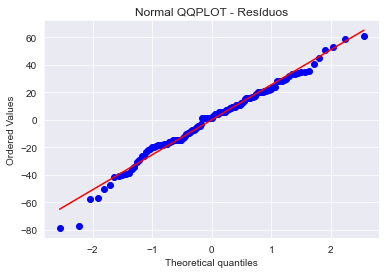

In [346]:
estatistica, p_value = stats.shapiro(residuos)

if p_value > 0.05:
    print(f'Shapiro Estatistica de Teste: {estatistica} --> Resíduos seguem Distribuição Normal')
    print(f'Shapiro p_value: {round(p_value, 3)} --> Resíduos seguem Distribuição Normal')
else:
    print(f'Shapiro Estatistica de Teste: {estatistica} --> Resíduos não seguem Distribuição Normal')
    print(f'Shapiro p_value: {round(p_value, 3)} --> Resíduos não seguem Distribuição Normal')


stats.probplot(residuos, dist = 'norm', plot = plt)
plt.title('Normal QQPLOT - Resíduos')
plt.show()

* Análise da Homocedasticidade dos Resíduos 

> 1. Análise Gráfica: Se formar um retângulo, o modelo passa no teste. No caso, aparentemente passa.

> 2. H0: Existe homocedasticidade: p_value > 0.05

> 3. H1: Não existe homocedasticidade: p_value <= 0.05

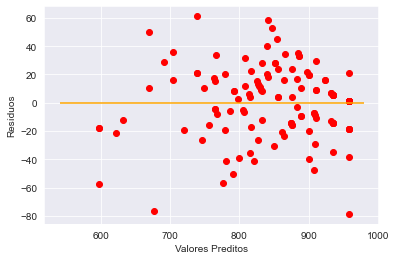

In [347]:
# Análise Gráfica

plt.scatter(y = residuos, x = modelo1.predict(), color = 'red')
plt.hlines(y = 0, xmin = colegiox.NOTA_REDACAO.min(), xmax = colegiox.NOTA_REDACAO.max(), color = 'orange')
plt.ylabel('Resíduos')
plt.xlabel('Valores Preditos')
plt.show()

In [348]:
# Análise Matemática

from statsmodels.compat import lzip 
import statsmodels.stats.api as sms

estatistica, p_value, f_value, fp_value = sms.het_breuschpagan(modelo1.resid, modelo1.model.exog)
print(f'Estatística de Teste: {estatistica}')
print(f'p_value: {p_value}')
print(f'Estatística de Teste: {f_value}')
print(f'Estatística de Teste: {fp_value}')

Estatística de Teste: 7.9398325686942
p_value: 0.04727168987447419
Estatística de Teste: 2.732037608197054
Estatística de Teste: 0.04659801474386656


> 4. Juntando as decisões gráficas e matemáticas, optou-se por aceitar a H0 de que os resíduos tem Homocedasticidade

* Análise de Outliers dos Resíduos

> 1. Os Outliers devem ter no student_resid em -3 e 3, mas não tem problema passar um pouco.

In [349]:
outliers = modelo1.outlier_test()
print(outliers.max())
print(outliers.min())

student_resid    2.466219
unadj_p          0.957876
bonf(p)          1.000000
dtype: float64
student_resid   -3.260297
unadj_p          0.001434
bonf(p)          0.186452
dtype: float64


* Análise de Multicolinearidade

> 1. Somente as variáveis independentes. 

> 2. Considerada multicolinearidade quando r > 0.9 

In [350]:
variaveis = colegiox[['COMP2', 'COMP4', 'COMP5']]
variaveis.head()

,COMP2,COMP4,COMP5
17,140.0,160.0,160.0
10760,200.0,200.0,140.0
13315,140.0,200.0,120.0
20006,180.0,180.0,140.0
26697,200.0,200.0,200.0


In [351]:
correlacoes = variaveis.corr(method = 'pearson')
correlacoes

,COMP2,COMP4,COMP5
COMP2,1.000000,0.375906,0.298434
COMP4,0.375906,1.000000,0.428872
COMP5,0.298434,0.428872,1.000000


## 4.16.3) Regressão Linear Multivariada com Statsmodels

* Análise do Modelo 

> 1. Intercept 

> 2. p_valor para cada coeficiente < 0.05 (estatisticamente significativos)

> 3. Adjusted R-Squared (explicação do modelo através dos dados)

> 4. Probabilidade da Estatística F < 0.05 (valida o modelo de regressão)

In [352]:
print(modelo1.summary())

                            OLS Regression Results                            
Dep. Variable:           NOTA_REDACAO   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     507.2
Date:                Fri, 01 Jul 2022   Prob (F-statistic):           3.97e-70
Time:                        00:17:07   Log-Likelihood:                -604.30
No. Observations:                 130   AIC:                             1217.
Df Residuals:                     126   BIC:                             1228.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    116.1987     19.162      6.064      0.0

nota_redacao = 116.1987+  1.2831*COMP2 + 1.7298*COMP4 + 1.1993*COMP5

In [353]:
# Criando uma coluna com previsão

colegiox['previsao_statsmodels'] = modelo1.fittedvalues
colegiox.head(5)

C:\Users\leova\AppData\Local\Temp/ipykernel_9512/3837795305.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  colegiox['previsao_statsmodels'] = modelo1.fittedvalues


,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,IDADE,SEXO,TP_ESTADO_CIVIL,RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,ESCOLA,CO_ESCOLA,...,TP_LINGUA,TP_STATUS_REDACAO,COMP1,COMP2,COMP3,COMP4,COMP5,NOTA_REDACAO,INTERNET,previsao_statsmodels
17,"1,90E+11",São Paulo,18,F,1,branca,1,2,privada,35132287.0,...,Inglês,1.0,160.0,140.0,140.0,160.0,160.0,760.0,Sim,764.498054
10760,"1,90E+11",São Paulo,17,M,1,parda,1,2,privada,35132287.0,...,Inglês,1.0,180.0,200.0,200.0,200.0,140.0,920.0,Sim,886.690642
13315,"1,90E+11",São Paulo,17,F,1,branca,1,2,privada,35132287.0,...,Inglês,1.0,160.0,140.0,160.0,200.0,120.0,780.0,Sim,785.718021
20006,"1,90E+11",São Paulo,17,F,1,branca,1,2,privada,35132287.0,...,Inglês,1.0,140.0,180.0,160.0,180.0,140.0,800.0,Sim,826.432059
26697,"1,90E+11",São Paulo,18,F,1,branca,1,2,privada,35132287.0,...,Inglês,1.0,160.0,200.0,200.0,200.0,200.0,960.0,Sim,958.650406


### 4.16.4) Regressão Linear Multivariada com SKlearn

In [354]:
from sklearn.linear_model import LinearRegression

x = colegiox[['COMP2', 'COMP4', 'COMP5']]
y = colegiox[['NOTA_REDACAO']]

modelo2 = LinearRegression()
modelo2.fit(x, y)

print(modelo2.intercept_)
print(modelo2.coef_)
print(f'Equação Nota Redação: {round(modelo2.intercept_[0], 3)} + {round(modelo2.coef_[0][0], 3)}*COMP2 + {round(modelo2.coef_[0][1], 3)}*COMP3 + {round(modelo2.coef_[0][2], 3)}*COMP4')
print(modelo2.score(x, y))
colegiox['previsao_sklearn'] = modelo2.predict(x)
colegiox.head(5)

[116.19870292]
[[1.28310055 1.72982856 1.1993294 ]]
Equação Nota Redação: 116.199 + 1.283*COMP2 + 1.73*COMP3 + 1.199*COMP4
0.9235273107066208


C:\Users\leova\AppData\Local\Temp/ipykernel_9512/131170970.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  colegiox['previsao_sklearn'] = modelo2.predict(x)


,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,IDADE,SEXO,TP_ESTADO_CIVIL,RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,ESCOLA,CO_ESCOLA,...,TP_STATUS_REDACAO,COMP1,COMP2,COMP3,COMP4,COMP5,NOTA_REDACAO,INTERNET,previsao_statsmodels,previsao_sklearn
17,"1,90E+11",São Paulo,18,F,1,branca,1,2,privada,35132287.0,...,1.0,160.0,140.0,140.0,160.0,160.0,760.0,Sim,764.498054,764.498054
10760,"1,90E+11",São Paulo,17,M,1,parda,1,2,privada,35132287.0,...,1.0,180.0,200.0,200.0,200.0,140.0,920.0,Sim,886.690642,886.690642
13315,"1,90E+11",São Paulo,17,F,1,branca,1,2,privada,35132287.0,...,1.0,160.0,140.0,160.0,200.0,120.0,780.0,Sim,785.718021,785.718021
20006,"1,90E+11",São Paulo,17,F,1,branca,1,2,privada,35132287.0,...,1.0,140.0,180.0,160.0,180.0,140.0,800.0,Sim,826.432059,826.432059
26697,"1,90E+11",São Paulo,18,F,1,branca,1,2,privada,35132287.0,...,1.0,160.0,200.0,200.0,200.0,200.0,960.0,Sim,958.650406,958.650406


# <font color='red' style='font-size: 30px;'>7.0 Regressão Polinomial </font>
<hr style='border: 2px solid red;'>





## 7.1) Regressão Polinomial

> 1. Ajusta uma equação não linear por meio de funções polinomiais de variável independente. 

<img src = './img52.png' width='70%'>

> 2. Pontos de Máximo e Mínimo da função: 
    
    * Se a concavidade da curva fosse para baixo, a Derivada nos daria o ponto de Máximo.

    * Se a equação é terceiro ou maior grau, poderíamos ter Pontos de Máximo e Mínimo

<img src = './img55.png' width='70%'>

## 7.2) Regressão Polinomial Exemplo

### 7.2.1) Análise Inicial

In [355]:
vendas = pd.read_excel('comissao.xlsx')
print(vendas.shape)
print(vendas.dtypes)
vendas.head()

(50, 2)
quantidade    int64
comissao      int64
dtype: object


,quantidade,comissao
0,1,728
1,2,762
2,3,802
3,4,848
4,5,900


* Trocando tipagem dos dados 

In [356]:
vendas['comissao'] = vendas['comissao'].apply(lambda x: float(x))
print(vendas.dtypes)

quantidade      int64
comissao      float64
dtype: object


* Análise de Valores Missing 

In [357]:
vendas.isnull().sum()

quantidade    0
comissao      0
dtype: int64

### 7.2.2) Análise de Correlação

* Gráfico de Dispersão 

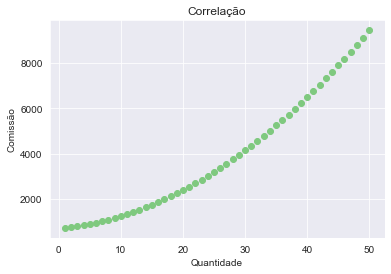

In [358]:
plt.scatter(x = vendas.quantidade, y = vendas.comissao)
plt.title('Correlação')
plt.xlabel('Quantidade')
plt.ylabel('Comissão')
plt.grid(True)
plt.show()

* Análise de Normalidade 

Estatística Teste: 0.9124540090560913
p_value 0.0012719858204945922



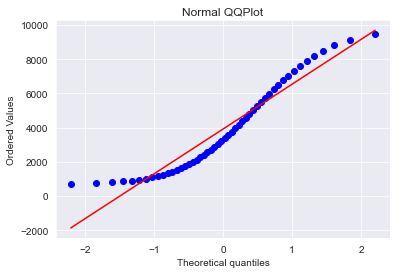

In [359]:
estatistica, p_value = stats.shapiro(vendas.comissao)
print(f'Estatística Teste: {estatistica}')
print(f'p_value {p_value}')
print()
stats.probplot(vendas['comissao'], dist = 'norm', plot = plt)
plt.title('Normal QQPlot')
plt.show()

> 1. Como uma das variáveis já não é normal e temos mais de 30 amostras, teremos de utilizar a Correlação de Spearman.

* Correlação de Spearman 

> 1. H0: Não existe correlação linear: p_value > 0.05

> 2. H1: Existe correlação linear: p_value <= 0.05

Coeficiente de Correlação: 0.9999999999999999
p_value : 0.0


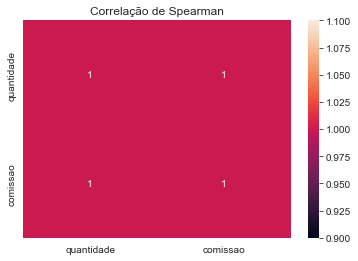

In [360]:
coef, p_value = stats.spearmanr(a=vendas.quantidade, b=vendas.comissao)
print(f'Coeficiente de Correlação: {coef}')
print(f'p_value : {p_value}')

correlacoes = vendas.corr(method='spearman')
plt.figure()
sns.heatmap(correlacoes, annot = True)
plt.title('Correlação de Spearman')
plt.show()

### 7.2.3) Testando Regressão Linear

> 1. O gráfico de dispersão nos mostra uma reta não linear, entretanto, ela se aproxima de uma. Por conta disso, vale a pena testarmos uma Regressão Linear 

* Regressão Linear 

In [361]:
import statsmodels.formula.api as smf 
import statsmodels.stats.api as sms 

regressao = smf.ols('comissao ~ quantidade', data = vendas).fit()
residuos = regressao.resid

print(regressao.summary())

                            OLS Regression Results                            
Dep. Variable:               comissao   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     1016.
Date:                Fri, 01 Jul 2022   Prob (F-statistic):           5.98e-34
Time:                        00:17:09   Log-Likelihood:                -387.21
No. Observations:                  50   AIC:                             778.4
Df Residuals:                      48   BIC:                             782.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -626.0000    163.662     -3.825      0.0

> 1. O R-Squared está com 95% de ajuste, ou seja, o modelo se ajusta bem a uma regressão linear. 

> 2. A Prob F-Statistic está menor que 5%, ou seja, o modelo está bem ajustado. 

> 3. O p_value está menor que 0.05, ou seja, o modelo está bem ajustado. 

> 4. Estatística t está ajustada.

    * H0: Coeficiente = 0: p_value > 0.05 -> coeficiente não validado

    * H1: Coeficiente != 0: p_value <= 0.05 -> coeficiente validado

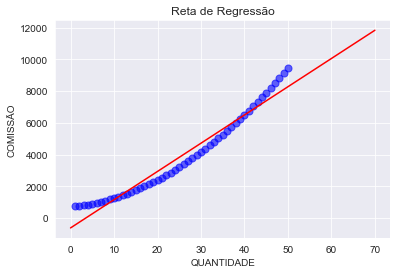

In [362]:
plt.scatter(y = vendas.comissao, x = vendas.quantidade, color = 'blue', s = 50, alpha = 0.6)
x_plot = np.linspace(0, 70)
plt.plot(x_plot, regressao.params[0]+ x_plot*regressao.params[1] , color = 'r')
plt.title('Reta de Regressão')
plt.ylabel('COMISSÃO')
plt.xlabel('QUANTIDADE')
plt.grid(True)
plt.show()

> 1. Qual o problema dessa regressão linear? Note que o Intercepto é um valor negativo, ou seja, o funcionário sempre perderia dinheiro, independentemente se vender 0 ou quantos produtos forem.

> 2. Nesse âmbito, fica claro que nossa regressão, embora passe nos testes realizados, não possui "sentido" matematicamente e nem para o viés de negócio.

### 7.2.4) Regreessão Polinomial com Numpy 

* Regressão Polinomial com Numpy - Grau 2

> 1. y = b0 + b1.x + b2.x^2

[  3.  25. 700.]
Coeficiente que multiplica o X^2: 3 |  Coeficiente que multiplica o X: 25 | Intercepto: 700

Comissao = 3*quantidade^2+ 25*quantidade + 700

[ 728.  762.  802.  848.  900.  958. 1022. 1092. 1168. 1250. 1338. 1432.
 1532. 1638. 1750. 1868. 1992. 2122. 2258. 2400. 2548. 2702. 2862. 3028.
 3200. 3378. 3562. 3752. 3948. 4150. 4358. 4572. 4792. 5018. 5250. 5488.
 5732. 5982. 6238. 6500. 6768. 7042. 7322. 7608. 7900. 8198. 8502. 8812.
 9128. 9450.]



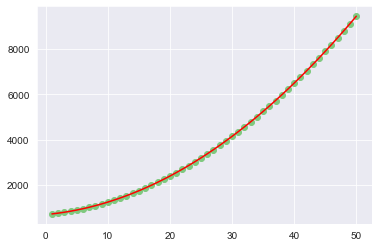

In [363]:
modelo2 = np.poly1d(np.polyfit(vendas.quantidade, vendas.comissao, 2))
print(modelo2.coef)
print(f'Coeficiente que multiplica o X^2: {round(modelo2.coef[0])} |  Coeficiente que multiplica o X: {round(modelo2.coef[1])} | Intercepto: {round(modelo2.coef[2])}')
print()
print(f'Comissao = {round(modelo2.coef[0])}*quantidade^2+ {round(modelo2.coef[1])}*quantidade + {round(modelo2.coef[2])}')
print()
y2 = modelo2(vendas.quantidade)
print(y2)
print()
plt.scatter(vendas.quantidade, vendas.comissao)
plt.plot(vendas.quantidade, y2, color = 'red')
plt.grid(True)
plt.show()

* Regressão Polinomial com Numpy - Grau 3

> 1. y = b0 + b1.x + b2.x^3 

[-1.08606946e-16  3.00000000e+00  2.50000000e+01  7.00000000e+02]
Coeficiente que multiplica o X^3: -1.0860694586005637e-16 | Coeficiente que multiplica o X^2: 3.000000000000008 |  Coeficiente que multiplica o X: 24.99999999999987 | Intercepto: 700.0000000000011

Comissao = -1.0860694586005637e-16*quantidade^3 + 3.000000000000008*quantidade^2 + 24.99999999999987*quantidade + 700.0000000000011

[ 728.  762.  802.  848.  900.  958. 1022. 1092. 1168. 1250. 1338. 1432.
 1532. 1638. 1750. 1868. 1992. 2122. 2258. 2400. 2548. 2702. 2862. 3028.
 3200. 3378. 3562. 3752. 3948. 4150. 4358. 4572. 4792. 5018. 5250. 5488.
 5732. 5982. 6238. 6500. 6768. 7042. 7322. 7608. 7900. 8198. 8502. 8812.
 9128. 9450.]



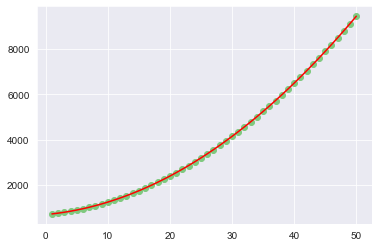

In [364]:
modelo3 = np.poly1d(np.polyfit(vendas.quantidade, vendas.comissao, 3))
print(modelo3.coef)
print(f'Coeficiente que multiplica o X^3: {modelo3.coef[0]} | Coeficiente que multiplica o X^2: {modelo3.coef[1]} |  Coeficiente que multiplica o X: {modelo3.coef[2]} | Intercepto: {modelo3.coef[3]}')
print()
print(f'Comissao = {modelo3.coef[0]}*quantidade^3 + {modelo3.coef[1]}*quantidade^2 + {modelo3.coef[2]}*quantidade + {modelo3.coef[3]}')
print()
y3 = modelo3(vendas.quantidade)
print(y3)
print()
plt.scatter(vendas.quantidade, vendas.comissao)
plt.plot(vendas.quantidade, y3, color = 'red')
plt.grid(True)
plt.show()

### 7.2.5) Regressão Polinomial com Sklearn

In [365]:
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import LinearRegression 
print('Variável X')
x = vendas[['quantidade']]
display(x.head())
display(x.tail())
print()
print('Variável Y')
y = vendas.comissao 
print(y.head())
print()

print('Preprocessing')
pre_process = PolynomialFeatures(degree = 2)
x_polinomial = pre_process.fit_transform(x)
x_polinomial

Variável X


,quantidade
0,1
1,2
2,3
3,4
4,5


,quantidade
45,46
46,47
47,48
48,49
49,50



Variável Y
0    728.0
1    762.0
2    802.0
3    848.0
4    900.0
Name: comissao, dtype: float64

Preprocessing


array([[1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00],
       [1.000e+00, 3.000e+00, 9.000e+00],
       [1.000e+00, 4.000e+00, 1.600e+01],
       [1.000e+00, 5.000e+00, 2.500e+01],
       [1.000e+00, 6.000e+00, 3.600e+01],
       [1.000e+00, 7.000e+00, 4.900e+01],
       [1.000e+00, 8.000e+00, 6.400e+01],
       [1.000e+00, 9.000e+00, 8.100e+01],
       [1.000e+00, 1.000e+01, 1.000e+02],
       [1.000e+00, 1.100e+01, 1.210e+02],
       [1.000e+00, 1.200e+01, 1.440e+02],
       [1.000e+00, 1.300e+01, 1.690e+02],
       [1.000e+00, 1.400e+01, 1.960e+02],
       [1.000e+00, 1.500e+01, 2.250e+02],
       [1.000e+00, 1.600e+01, 2.560e+02],
       [1.000e+00, 1.700e+01, 2.890e+02],
       [1.000e+00, 1.800e+01, 3.240e+02],
       [1.000e+00, 1.900e+01, 3.610e+02],
       [1.000e+00, 2.000e+01, 4.000e+02],
       [1.000e+00, 2.100e+01, 4.410e+02],
       [1.000e+00, 2.200e+01, 4.840e+02],
       [1.000e+00, 2.300e+01, 5.290e+02],
       [1.000e+00, 2.400e+01, 5.76

* Criação do Modelo de Regressão Polinomial 

In [366]:
modelo_sk = LinearRegression()
modelo_sk.fit(x_polinomial, y)

y_pred = modelo_sk.predict(x_polinomial)
y_pred

array([ 728.,  762.,  802.,  848.,  900.,  958., 1022., 1092., 1168.,
       1250., 1338., 1432., 1532., 1638., 1750., 1868., 1992., 2122.,
       2258., 2400., 2548., 2702., 2862., 3028., 3200., 3378., 3562.,
       3752., 3948., 4150., 4358., 4572., 4792., 5018., 5250., 5488.,
       5732., 5982., 6238., 6500., 6768., 7042., 7322., 7608., 7900.,
       8198., 8502., 8812., 9128., 9450.])

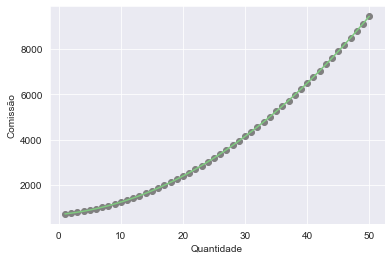

In [367]:
plt.scatter(x, y, c = 'gray')
plt.xlabel('Quantidade')
plt.ylabel('Comissão')
plt.plot(x, y_pred)

In [368]:
print(modelo_sk.intercept_)
print(modelo_sk.coef_)

print(f'Comissao = {modelo_sk.intercept_} + {modelo_sk.coef_[1]} *quantidade + {modelo_sk.coef_[2]}*quantidade^2')

700.0000000000059
[ 0. 25.  3.]
Comissao = 700.0000000000059 + 24.999999999999638 *quantidade + 3.0000000000000036*quantidade^2


### 7.2.6) Previsão 

In [369]:
quantidade = 60
previsao = modelo_sk.predict(pre_process.fit_transform([[quantidade]]))
print(f'Se vender {quantidade}, o funcionário ganhará {previsao[0]} reais de comissão')

Se vender 60, o funcionário ganhará 12999.999999999996 reais de comissão


# <font color='red' style='font-size: 30px;'>8.0 Regressão Logística </font>
<hr style='border: 2px solid red;'>





## 8.1) Regressão Logística

> 1. A Regressão Logística nos da a chance de determinado evento acontecer, ou não.

    A chance pode ser definida como:

# $$ C = \frac {p} {1-p} $$

sendo $p$ a probabilidade do evento ocorrer.

> 2. Ela é semelhante a Regressão Linear, porém a variável de resposta é binária: sucesso ou fracasso, verdadeiro ou falso, 1 ou 0; ou múltipla: mais de 2 classes.

> 3. Explicando a Transformação de Regressão Linear para Regressão Logística:

    1. Quando pensamos em Regressão Linear, nós temos limites de - inifito até + infinito para a variável alvo e para a equação, pois se trata de um modelo baseado em variáveis contínuas.

    2. Como agora queremos classificar um evento, temos de adaptar tal equação para agora nos dar a chance desse evento ocorrer, portanto, temos de mudar os limites, visto que agora trabalhamos não só com variáveis contínuas, mas com variáveis categóricas também.

    3. Com a aplicação de logaritmos naturais de ambos os lados, conseguimos agora ter as chances do evento ocorrer, logo, o limite da variável alvo varia de 0 até + infinito e o limite da equação permanece em - infinito até + infinito.

    4. A curva mostrada no gráfico chamado chama-se Sigmoide

> 3. O sucesso ou o fracasso é representado através das chances.

<img src = './img56.png' width = '70%' >


> 4. Os coeficientes b0, b1, b2... podem ser interpretados da seguinte maneira:

    1. Primeiramente fazemos uma coisa chamada Razão de Chances ou Odds Ratio. Ela é uma medida de tamanho de efeito que indica a chance de ocorrência de um desfecho em um grupo quando comparado a outro. Seus valores variam entre 0 e infinito. Cada coeficiente é uma Odd Ratio.

    2. Quando a Odds Ratio é igual a 1, significa que a chance do meu evento de interesse ocorrer permanece igual.

    3. Quando a Odds Ratio é menor que 1, significa que a chance do meu evento de interesse ocorrer diminuiu.
    
    4. Quando a Odds Ratio é maior que 1, significa que a chance do meu evento de interesse ocorrer aumentou.


> 5. Seu funcionamento consiste em definir as chances para cada caso e, após isso, transformá-las em valor absoluto (0 ou 1) de acordo com o nosso CutOff, o qual nós cientistas definimos para cada caso. 

> 6. No exemplo a seguir, probabilidades menores que 0.5 são classificadas como 0, ao passo que probabilidades maiores que 0.5 são classificadas como 1

<img src = './img57.png' width = '70%' >

> 7. A função custo mais utilizada em Regressão Logística é Cross-Entropy, pois ela nos da a impureza de cada variável de forma bem completa. 


## 8.2) Quando utilizar a Regressão Logística Binária?

> 1. Variável dependente com distribuição binomial.

> 2. Reprovação no teste de homocedasticidade.

> 3. Resíduos não seguem distribuição normal.

## 8.3) Aplicação de um Modelo de Regressão Logística Binária

### 8.3.1) Análise inicial

> 1. Objetivo: Analisar se existe uma tendência de óbito entre pessoas do sexo feminino e masculino.

* Importando os dados 

In [370]:
doenca_pre = pd.read_csv('casos_obitos_doencas_preexistentes.csv', sep = ';', encoding = 'utf-8')
print(doenca_pre.shape)
print(doenca_pre.dtypes)
doenca_pre.head()

(2044699, 20)
nome_munic                  object
codigo_ibge                  int64
idade                      float64
cs_sexo                     object
diagnostico_covid19         object
data_inicio_sintomas        object
obito                        int64
asma                        object
cardiopatia                 object
diabetes                    object
doenca_hematologica         object
doenca_hepatica             object
doenca_neurologica          object
doenca_renal                object
imunodepressao              object
obesidade                   object
outros_fatores_de_risco     object
pneumopatia                 object
puerpera                    object
sindrome_de_down            object
dtype: object


,nome_munic,codigo_ibge,idade,cs_sexo,diagnostico_covid19,data_inicio_sintomas,obito,asma,cardiopatia,diabetes,doenca_hematologica,doenca_hepatica,doenca_neurologica,doenca_renal,imunodepressao,obesidade,outros_fatores_de_risco,pneumopatia,puerpera,sindrome_de_down
0,Carapicuíba,3510609,36.0,FEMININO,CONFIRMADO,2020-07-10,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO
1,Jacareí,3524402,54.0,FEMININO,CONFIRMADO,2020-07-09,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO
2,Vargem Grande Paulista,3556453,33.0,FEMININO,CONFIRMADO,2020-07-10,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO
3,Paulínia,3536505,47.0,FEMININO,CONFIRMADO,2021-01-25,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO
4,Santo André,3547809,41.0,FEMININO,CONFIRMADO,2021-01-10,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO


* Analisando os Valores Missing NaN 

In [371]:
doenca_pre.isnull().sum()

nome_munic                     0
codigo_ibge                    0
idade                       2707
cs_sexo                        1
diagnostico_covid19            0
data_inicio_sintomas       34042
obito                          0
asma                           0
cardiopatia                    0
diabetes                       0
doenca_hematologica            0
doenca_hepatica                0
doenca_neurologica             0
doenca_renal                   0
imunodepressao                 0
obesidade                      0
outros_fatores_de_risco        0
pneumopatia                    0
puerpera                       0
sindrome_de_down               0
dtype: int64

In [372]:
doenca_pre.dropna(subset = ['cs_sexo'], inplace = True)

* Analisando a Frequência para os Sexos

In [373]:
doenca_pre['cs_sexo'].value_counts()

FEMININO      1094872
MASCULINO      944309
INDEFINIDO       5487
IGNORADO           30
Name: cs_sexo, dtype: int64

In [374]:
relacao = doenca_pre.loc[doenca_pre.cs_sexo != 'IGNORADO']
relacao = relacao.loc[doenca_pre.cs_sexo != 'INDEFINIDO']
relacao['cs_sexo'].value_counts()

FEMININO     1094872
MASCULINO     944309
Name: cs_sexo, dtype: int64

* Análise de Frequência de Óbitos 

In [375]:
relacao.obito.value_counts()

0    1979636
1      59545
Name: obito, dtype: int64

* Trocando variáveis 

In [376]:
relacao['obito'] = relacao['obito'].replace({0:'nao', 1:'sim'})
relacao['obito'] = relacao['obito'].astype('category')

* Análise das Variáveis 

In [377]:
relacao.dtypes

nome_munic                   object
codigo_ibge                   int64
idade                       float64
cs_sexo                      object
diagnostico_covid19          object
data_inicio_sintomas         object
obito                      category
asma                         object
cardiopatia                  object
diabetes                     object
doenca_hematologica          object
doenca_hepatica              object
doenca_neurologica           object
doenca_renal                 object
imunodepressao               object
obesidade                    object
outros_fatores_de_risco      object
pneumopatia                  object
puerpera                     object
sindrome_de_down             object
dtype: object

### 8.3.2) Modelo 1: Uma variável independente

> 1. Variável Dependente binária (Dicotômica).

> 2. Categorias mutuamente exclusivas (Uma pessoa não pode estar em duas situações). 

> 3. Independência das observações (sem medidas repetidas). 

* Criação e Análise do modelo

> 1. H0: Estatisticamente não é significativo: p_value > 0.05

> 2. H1: Estatisticamente significativo: p_value <= 0.05

> 3. Análise da Ausência de Outliers e Pontos de Alavancagem devem estar entre -3 e 3.



In [378]:
import statsmodels.api as sm 
import statsmodels.formula.api as smf 

modelo1 = smf.glm(formula = 'obito ~ cs_sexo', data = relacao, family = sm.families.Binomial()).fit()
print(modelo1.summary())

                      Generalized Linear Model Regression Results                       
Dep. Variable:     ['obito[nao]', 'obito[sim]']   No. Observations:              2039181
Model:                                      GLM   Df Residuals:                  2039179
Model Family:                          Binomial   Df Model:                            1
Link Function:                            logit   Scale:                          1.0000
Method:                                    IRLS   Log-Likelihood:            -2.6764e+05
Date:                          Fri, 01 Jul 2022   Deviance:                   5.3528e+05
Time:                                  00:17:32   Pearson chi2:                 2.04e+06
No. Iterations:                               7                                         
Covariance Type:                      nonrobust                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
---------------------

> 1. O coeficiente cs_sexo está relacionado a não a ir óbito ou a ir a óbito? R: Ir a óbito 

In [379]:
modelo_prova = smf.glm(formula = 'cs_sexo ~ obito', data = relacao, family = sm.families.Binomial()).fit()
print(modelo_prova.summary())

                              Generalized Linear Model Regression Results                              
Dep. Variable:     ['cs_sexo[FEMININO]', 'cs_sexo[MASCULINO]']   No. Observations:              2039181
Model:                                                     GLM   Df Residuals:                  2039179
Model Family:                                         Binomial   Df Model:                            1
Link Function:                                           logit   Scale:                          1.0000
Method:                                                   IRLS   Log-Likelihood:            -1.4065e+06
Date:                                         Fri, 01 Jul 2022   Deviance:                   2.8129e+06
Time:                                                 00:17:44   Pearson chi2:                 2.04e+06
No. Iterations:                                              4                                         
Covariance Type:                                     nonrobust  

> 2. Note que o coeficiente permanece o mesmo, comprovando a hipótese anterior de que o cs_sexo está relacionado a ir a óbito. 

* Razão de Chance com Intervalo de Confiança de 95% 

In [380]:
razao = np.exp(modelo1.params[1])
print(f'razao = {razao}')
chance = 1/razao 
print(f'chance = {coef}')

razao = 0.6397308077922305
chance = 0.9999999999999999


> 1. Estatisticamente, com intervalo de confiança de 95%, os homens tem 63.97% menos chances de sobrevivência do que mulheres. 

> 2. Estatisticamente, com intervalo de confiança de 95%, a chance de uma pessoa do sexo masculino ir a óbito é 1.56 vezes maior do que a chance de uma pessoa do sexo feminino. 

### 8.3.2) Modelo 2: Mais de uma variável independente 


* Criação e Análise do modelo

> 1. H0: Estatisticamente não é significativo: p_value > 0.05

> 2. H1: Estatisticamente significativo: p_value <= 0.05

> 3. Análise da Ausência de Outliers e Pontos de Alavancagem devem estar entre -3 e 3.

> 4. Ausência de Multicolinearidade entre as variáveis independentes.


* Análise de Frequência de Diabetes

In [381]:
import statsmodels.api as sm 
import statsmodels.formula.api as smf 

relacao['diabetes'].value_counts()

IGNORADO    1859885
SIM          125108
NÃO           54188
Name: diabetes, dtype: int64

In [382]:
relacao2 = relacao.loc[relacao.diabetes != 'IGNORADO']
relacao2['diabetes'].value_counts()

SIM    125108
NÃO     54188
Name: diabetes, dtype: int64

In [383]:
relacao2['diabetes'] = relacao2['diabetes'].astype('category')
relacao2['cs_sexo'] = relacao2['cs_sexo'].astype('category')
relacao2.dtypes

C:\Users\leova\AppData\Local\Temp/ipykernel_9512/3187815974.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relacao2['diabetes'] = relacao2['diabetes'].astype('category')
C:\Users\leova\AppData\Local\Temp/ipykernel_9512/3187815974.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relacao2['cs_sexo'] = relacao2['cs_sexo'].astype('category')


nome_munic                   object
codigo_ibge                   int64
idade                       float64
cs_sexo                    category
diagnostico_covid19          object
data_inicio_sintomas         object
obito                      category
asma                         object
cardiopatia                  object
diabetes                   category
doenca_hematologica          object
doenca_hepatica              object
doenca_neurologica           object
doenca_renal                 object
imunodepressao               object
obesidade                    object
outros_fatores_de_risco      object
pneumopatia                  object
puerpera                     object
sindrome_de_down             object
dtype: object

* Criação do Modelo 

In [384]:
modelo2 = smf.glm(formula = 'obito ~ cs_sexo + diabetes', data = relacao2, family = sm.families.Binomial()).fit()
print(modelo2.summary())

                      Generalized Linear Model Regression Results                       
Dep. Variable:     ['obito[nao]', 'obito[sim]']   No. Observations:               179296
Model:                                      GLM   Df Residuals:                   179293
Model Family:                          Binomial   Df Model:                            2
Link Function:                            logit   Scale:                          1.0000
Method:                                    IRLS   Log-Likelihood:                -89094.
Date:                          Fri, 01 Jul 2022   Deviance:                   1.7819e+05
Time:                                  00:17:45   Pearson chi2:                 1.79e+05
No. Iterations:                               5                                         
Covariance Type:                      nonrobust                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
---------------------

In [385]:
modelo2.params

Intercept               0.945785
cs_sexo[T.MASCULINO]   -0.291820
diabetes[T.SIM]         0.832160
dtype: float64

> 1. Chance com Intervalo de Confiança de 95% dos homens com relação as mulheres 

In [386]:
chance = 1/ (np.exp(modelo2.params[1]))
chance 

1.3388623577360539

> 2. Chance com Intervalo de Confiança de 95% dos diabéticos com relação aos não diabéticos 

In [387]:
chance = 1/ (np.exp(modelo2.params[2]))
chance 

0.43510824873108545

> 3. Conclusão: 

    * Os Homens tem 1.33 a mais de chance de ir a óbito que as mulheres.

    * Quem tem diabetes, tem menos chance de ir a óbito; entretanto, o resultado está claramente inconsistente devido a presença enorme de dados ignorados. 



### 8.3.3) Modelo 3: Variável Independente Númerica 

* Análise Inicial 

In [388]:
relacao3 = doenca_pre.loc[doenca_pre.nome_munic == 'Santos']
print(relacao3.shape)
print(relacao3.dtypes)
relacao3.head()

(39955, 20)
nome_munic                  object
codigo_ibge                  int64
idade                      float64
cs_sexo                     object
diagnostico_covid19         object
data_inicio_sintomas        object
obito                        int64
asma                        object
cardiopatia                 object
diabetes                    object
doenca_hematologica         object
doenca_hepatica             object
doenca_neurologica          object
doenca_renal                object
imunodepressao              object
obesidade                   object
outros_fatores_de_risco     object
pneumopatia                 object
puerpera                    object
sindrome_de_down            object
dtype: object


,nome_munic,codigo_ibge,idade,cs_sexo,diagnostico_covid19,data_inicio_sintomas,obito,asma,cardiopatia,diabetes,doenca_hematologica,doenca_hepatica,doenca_neurologica,doenca_renal,imunodepressao,obesidade,outros_fatores_de_risco,pneumopatia,puerpera,sindrome_de_down
43,Santos,3548500,42.0,MASCULINO,CONFIRMADO,2020-12-02,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO
47,Santos,3548500,43.0,MASCULINO,CONFIRMADO,2020-06-03,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO
53,Santos,3548500,51.0,MASCULINO,CONFIRMADO,2020-12-06,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO
206,Santos,3548500,23.0,FEMININO,CONFIRMADO,2020-05-18,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO
267,Santos,3548500,46.0,MASCULINO,CONFIRMADO,2020-10-17,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO


* Valores Missing NaN  

In [389]:
relacao3.isnull().sum()

nome_munic                   0
codigo_ibge                  0
idade                       20
cs_sexo                      0
diagnostico_covid19          0
data_inicio_sintomas       285
obito                        0
asma                         0
cardiopatia                  0
diabetes                     0
doenca_hematologica          0
doenca_hepatica              0
doenca_neurologica           0
doenca_renal                 0
imunodepressao               0
obesidade                    0
outros_fatores_de_risco      0
pneumopatia                  0
puerpera                     0
sindrome_de_down             0
dtype: int64

In [390]:
relacao3.dropna(subset = ['idade'], inplace = True)

c:\Users\leova\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


* Gráfico de Dispersão 

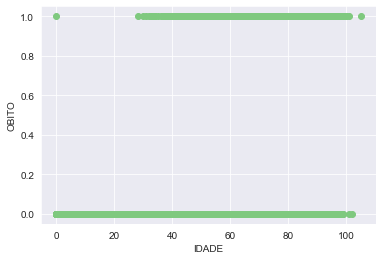

In [391]:
plt.scatter(relacao3.idade, relacao3.obito)
plt.xlabel('IDADE')
plt.ylabel('OBITO')
plt.grid(True)
plt.show()

* Análise de Multicolinearidade 

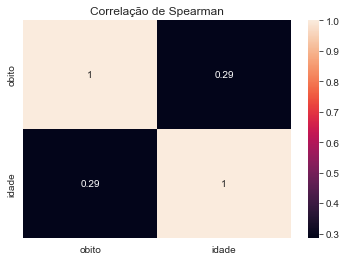

In [392]:
correlacoes = relacao3[['obito', 'idade']].corr(method='pearson')
plt.figure()
sns.heatmap(correlacoes, annot = True)
plt.title('Correlação de Spearman')
plt.show()

* Criação do Modelo 3 com StatsModels 

In [393]:
import statsmodels.api as sm 
import statsmodels.formula.api as smf 

modelo3 = smf.glm(formula = 'obito ~ idade', data = relacao3, family = sm.families.Binomial()).fit()
print(modelo3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  obito   No. Observations:                39935
Model:                            GLM   Df Residuals:                    39933
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3398.6
Date:                Fri, 01 Jul 2022   Deviance:                       6797.2
Time:                        00:17:48   Pearson chi2:                 6.10e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.2606      0.178    -57.797      0.0

In [394]:
np.exp(modelo3.params[1])

1.1190949075746894

> 1. Conclusão:

    Para cada ano mais velho, o indivíduo fica com 1.12 a mais de chance de óbito em relação a chance de outro indivíduo com um ano a menos.

*  Modelo 3 com Sklearn 

In [395]:
from sklearn.linear_model import LogisticRegression

relacao3.head()

,nome_munic,codigo_ibge,idade,cs_sexo,diagnostico_covid19,data_inicio_sintomas,obito,asma,cardiopatia,diabetes,doenca_hematologica,doenca_hepatica,doenca_neurologica,doenca_renal,imunodepressao,obesidade,outros_fatores_de_risco,pneumopatia,puerpera,sindrome_de_down
43,Santos,3548500,42.0,MASCULINO,CONFIRMADO,2020-12-02,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO
47,Santos,3548500,43.0,MASCULINO,CONFIRMADO,2020-06-03,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO
53,Santos,3548500,51.0,MASCULINO,CONFIRMADO,2020-12-06,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO
206,Santos,3548500,23.0,FEMININO,CONFIRMADO,2020-05-18,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO
267,Santos,3548500,46.0,MASCULINO,CONFIRMADO,2020-10-17,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO


In [396]:
# Criação das variáveis 

x = relacao3.iloc[:, 2].values 
y = relacao3.iloc[:, 6].values

# Transformação do X para o formato de Matriz

x = x.reshape(-1, 1)
x

array([[42.],
       [43.],
       [51.],
       ...,
       [22.],
       [43.],
       [32.]])

In [397]:
modelo3s = LogisticRegression()
modelo3s.fit(x, y)

print(modelo3s.coef_)
print(modelo3s.intercept_)

[[0.11251957]]
[-10.26054488]


In [398]:
# Razão de chance com Intervalo de Confiança de 95% 
np.exp(modelo3s.coef_)

array([[1.11909416]])

## 8.5) Quando Utilizar Regressão Logística Multi-Classe ?

> 1. Neste caso, ao invés da saída ser 0 ou 1, ela pode ser 0, 1, 2...n.

> 2. Neste caso, usamos a Regressão Logística Binária para cada uma das classes.

> 3. A classe considerada será aquela com a maior probabilidade em comparação com as demais.

# <font color='red' style='font-size: 30px;'>9.0 Regressão Quantílica </font>
<hr style='border: 2px solid red;'>



## 9.1) Regressão Quantílica 

> 1. É um complemento para a Regressão Linear.

> 2. Indicada quando existe Outliers e Não há Homocedasticidade nos Resíduos.

> 3. Utiliza os quantis como referência, pois a média não descreve toda a Distribuição, como no caso da regressão Linear.

> 4. Variável dependente contínua.

> 5. O objetivo é estimar um determinado quantil da variável dependente. 

# $$ Y_i = b.X_i + e $$

<img src = './img58.png' width = '70%'>

## 9.2) Aplicação de uma Regressão Quantílica 

### 9.2.1) Análise Inicial 

* Importando os Dados

In [399]:
gasto = pd.read_excel('gasto_almoco.xlsx')
print(gasto.shape)
print(gasto.dtypes)
gasto.head()

(64, 4)
dia                 int64
gasto_dia_reais     int64
num_refeicoes       int64
gasto_acum_reais    int64
dtype: object


,dia,gasto_dia_reais,num_refeicoes,gasto_acum_reais
0,1,26,1,26
1,2,18,2,44
2,3,37,3,81
3,4,21,4,102
4,5,39,5,141


* Valores Missing 

In [400]:
gasto.isnull().sum()

dia                 0
gasto_dia_reais     0
num_refeicoes       0
gasto_acum_reais    0
dtype: int64

### 9.2.2) Análise da Correlação Linear 

* Gráfico de Dispersão 

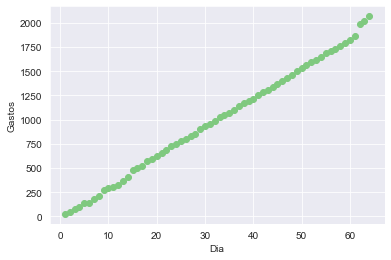

In [401]:
plt.scatter(gasto.dia, gasto.gasto_acum_reais)
plt.xlabel('Dia')
plt.ylabel('Gastos')
plt.grid(True)
plt.show()

* Análise da Normalidade 

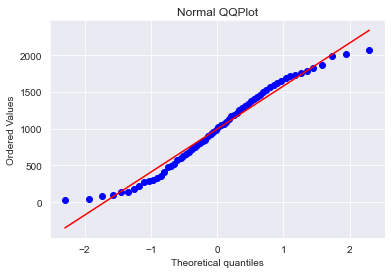

In [402]:
import scipy.stats as stats 
stats.probplot(gasto['gasto_acum_reais'], dist = 'norm', plot = plt)
plt.title('Normal QQPlot')
plt.show()

In [403]:
estatistica, p_value = stats.shapiro(gasto.gasto_acum_reais)
print(f'Estatística do Teste: {estatistica}')
print(f'p_value : {p_value}')

Estatística do Teste: 0.9621434211730957
p_value : 0.04712442681193352


* Análise da Correlação 

> 1. Pelo fato do p_valor ter dado menor que 0.05, a distribuição não é normal 


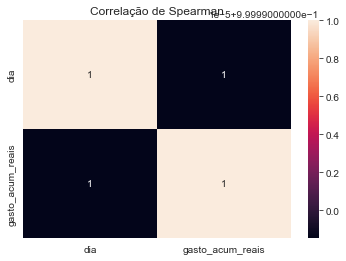

In [404]:
correlacoes = gasto[['dia', 'gasto_acum_reais']].corr(method='spearman')
plt.figure()
sns.heatmap(correlacoes, annot = True)
plt.title('Correlação de Spearman')
plt.show()

### 9.2.3) Modelo de Regressão Linear 

In [405]:
import statsmodels.stats.api as sms 

regressao_linear = smf.ols('gasto_acum_reais ~ dia', data = gasto).fit()
residuos = regressao_linear.resid

* Teste de Normalidade dos Resíduos 

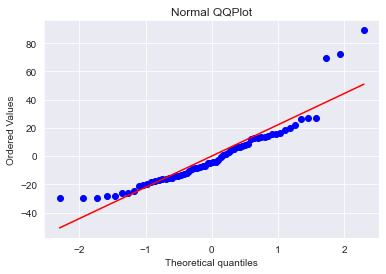

In [406]:
stats.probplot(residuos, dist = 'norm', plot = plt)
plt.title('Normal QQPlot')
plt.show()

In [407]:
estatistica, p_value = stats.shapiro(residuos)
print(f'Estatística do Teste: {estatistica}')
print(f'p_value : {p_value}')

Estatística do Teste: 0.8646501302719116
p_value : 4.715399882115889e-06


> 1. Distribuição não normal 

* Análise da Homocedasticidade dos Resíduos 

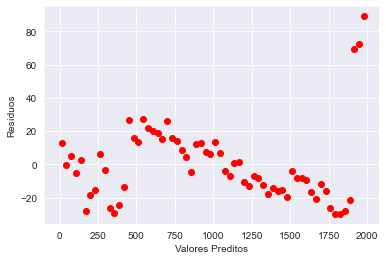

In [408]:
plt.scatter(y = residuos, x = regressao_linear.predict(), color = 'red')
plt.hlines(y = 0, xmin = 0, xmax= 4, color = 'orange')
plt.ylabel('Resíduos')
plt.xlabel('Valores Preditos')
plt.show()

In [409]:
estatistica, p_value, f_value, fp_value = sms.het_breuschpagan(regressao_linear.resid, regressao_linear.model.exog)
print(f'Estatística de Teste : {estatistica}')
print(f'p_value : {p_value}')
print(f'f_value : {f_value}')
print(f'fp_value : {fp_value}')


Estatística de Teste : 8.551798019780392
p_value : 0.003451811166879094
f_value : 9.562284407626597
fp_value : 0.0029756698764909014


> 1. Não existe Homocedasticidade pois o p_value é menor que 0.05 

* Análise de Outliers dos Resíduos 

> 1. Devem estar entre -3 e 3. 

In [410]:
outliers = regressao_linear.outlier_test()
print(outliers.max())
print(outliers.min())

student_resid    4.458242
unadj_p          0.982688
bonf(p)          1.000000
dtype: float64
student_resid   -1.305146
unadj_p          0.000036
bonf(p)          0.002309
dtype: float64


> 1. Possuem Outliers, no caso, Outlier Superior pois o student_resid foi bem maior que 4.45 

### 9.2.4) Regressão Quantílica 

> 1. Devido da variável dependente não seguir distribuição normal, os resíduos não seguirem distribuição normal, não haver homocedasticidade nos resíduos e terem Outliers também nos resíduos, devemos optar pela Regressão Quantílica. 

* Criação do Modelo 

In [411]:
modelo1 = smf.quantreg('gasto_acum_reais ~ dia', gasto)
resultado = modelo1.fit(q = 0.25)
print(resultado.summary())

                         QuantReg Regression Results                          
Dep. Variable:       gasto_acum_reais   Pseudo R-squared:               0.9705
Model:                       QuantReg   Bandwidth:                       19.83
Method:                 Least Squares   Sparsity:                        52.15
Date:                Fri, 01 Jul 2022   No. Observations:                   64
Time:                        00:17:52   Df Residuals:                       62
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -21.7143      6.536     -3.322      0.002     -34.780      -8.648
dia           30.9286      0.181    171.127      0.000      30.567      31.290


gasto_acum = -21.7143 + 30.9286* dia 

In [412]:
modelo2 = smf.quantreg('gasto_acum_reais ~ dia', gasto)
resultado = modelo2.fit(q = 0.50)
print(resultado.summary())

                         QuantReg Regression Results                          
Dep. Variable:       gasto_acum_reais   Pseudo R-squared:               0.9691
Model:                       QuantReg   Bandwidth:                       19.52
Method:                 Least Squares   Sparsity:                        43.96
Date:                Fri, 01 Jul 2022   No. Observations:                   64
Time:                        00:17:52   Df Residuals:                       62
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -8.0313      5.560     -1.445      0.154     -19.145       3.082
dia           30.7813      0.149    206.976      0.000      30.484      31.079


gasto_acum = -8.0313 + 30.7813* dia 

In [413]:
modelo3 = smf.quantreg('gasto_acum_reais ~ dia', gasto)
resultado = modelo3.fit(q = 0.75)
print(resultado.summary())

                         QuantReg Regression Results                          
Dep. Variable:       gasto_acum_reais   Pseudo R-squared:               0.9624
Model:                       QuantReg   Bandwidth:                       15.65
Method:                 Least Squares   Sparsity:                        45.18
Date:                Fri, 01 Jul 2022   No. Observations:                   64
Time:                        00:17:52   Df Residuals:                       62
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.4074      4.735      2.831      0.006       3.942      22.873
dia           30.4815      0.124    246.731      0.000      30.235      30.728


gasto_acum = 13.4074 + 30.4815* dia 

# <font color='red' style='font-size: 30px;'>10.0 Regressão Ridge, Lasso e Elastic Net  </font>
<hr style='border: 2px solid red;'>



> CONSULTAR:

https://medium.com/@jackelinegleme/regulariza%C3%A7%C3%A3o-lasso-l1-e-ridge-l2-a12efacc5fb3

## 10.1) Quando Utilizar ?

> 1. As Regressões Ridge, Lasso e Elastic Net são aplicadas para balanceamento entre problemas de Underfitting e Overfitting, chamado regularização. 

- Bias (ou viés em português): é o erro devido à diferença entre as previsões médias e os valores corretos que estamos tentando prever, quando treinamos um modelo, geralmente repetimos o processo de treinamento n vezes e cada vez que o modelo é treinado, um novo modelo é criado e pela aleatoriedade dos dados, consequentemente teremos uma variedade de previsões, então o Bias ou Viés é a distância, em geral, das previsões para o valor correto.

- Variance (ou variância em português): é o erro devido à variabilidade de uma previsão do modelo para um determinado ponto de dados. Repetindo novamente o treinamento, a variância mede o quanto as previsões do modelo variam entre diferentes realizações do modelo. 

<img src = './img59.png' width = '70%'>

- Baixo Bias e e Baixa Variance: É o modelo ideal e o que desejamos obter, com uma boa acurácia e precisão nas previsões. Ele significa que temos baixo erro em dados de treino e baixo erro em dados de teste.

- Baixo Bias e Alta Variance: O modelo está superestimando (overfitting) nos dados de treino e não generaliza bem com dados novos. Ele significa que temos baixo erro em dados de treino e alto erro em dados de teste.

- Alto Bias e Baixa Variance: O modelo está subestimando (underfitting) nos dados de treino e não captura a relação verdadeira entre as variáveis preditoras e a variável resposta. Ele significa que temos alto erros em dados de treino e em dados de teste.

- Alto Bias e Alta Variance: O modelo está inconsistente e com um acurácia muito baixa nas previsões. Ele significa que temos altos erros em dados de treino e erros ainda maiores em dados de teste.



> 2. São ideais para tratar problemas com variáveis independentes com alta multicolinearidade.

## 10.2) Ajuste na Regressão Linear

### Regularização L1 (Regressão Lasso)

<img src = './img62.png' width = '70%'>

### Regularização L2 (Regressão Ridge)

<img src = './img63.png' width = '70%'>

### Regularização L3 (Regressão Elastic Net)

<img src = './img64.png' width = '70%'>


### 10.3.1) Regressão Ridge - Objetivo: Criação de um modelo de regressão para variáveis com multicolinearidade 

* Importando os Dados 

In [414]:
gasto = pd.read_excel('gasto_almoco.xlsx')
print(gasto.shape)
print(gasto.dtypes)
gasto.head()

(64, 4)
dia                 int64
gasto_dia_reais     int64
num_refeicoes       int64
gasto_acum_reais    int64
dtype: object


,dia,gasto_dia_reais,num_refeicoes,gasto_acum_reais
0,1,26,1,26
1,2,18,2,44
2,3,37,3,81
3,4,21,4,102
4,5,39,5,141


* Valores Missing 

In [415]:
gasto.isnull().sum()

dia                 0
gasto_dia_reais     0
num_refeicoes       0
gasto_acum_reais    0
dtype: int64

* Análise de Correlação 

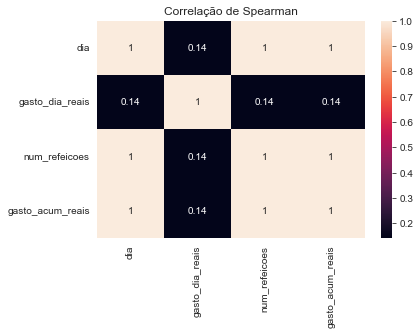

In [416]:
correlacoes = gasto.corr(method='spearman')
plt.figure()
sns.heatmap(correlacoes, annot = True)
plt.title('Correlação de Spearman')
plt.show()

> 1. Note que há alta correlação entre dia e num_refereicoes 

* Analise de Variância 

# $$ VIF_j = \frac {1} {1 - {R_j}^2} $$

In [417]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

vif = add_constant (gasto) # Função espera a presença de uma constante na matriz de variáveis explicativas
pd.Series([variance_inflation_factor(vif.values, i) for i in range(vif.shape[1])], index = vif.columns)

c:\Users\leova\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const                 11.762488
dia                  836.171143
gasto_dia_reais        1.402142
num_refeicoes       2777.880784
gasto_acum_reais    3306.046633
dtype: float64

* Modelo Ridge 

In [418]:
gasto1 = gasto.drop('gasto_dia_reais', axis = 1)

x = gasto1.iloc[:, 0:2].values 
y = gasto1.iloc[:, 2].values 

In [419]:
from sklearn.linear_model import Ridge 

# Deve-se escolher o melhor parâmetro de regularização (alpha)
modelo_ridge = Ridge(alpha = 0)
modelo_ridge.fit(x, y)
modelo_ridge.score(x, y)

0.9996807593215069

In [420]:
print(modelo_ridge.intercept_)
print(modelo_ridge.coef_)

2.6345750647848263
[ 4.89145178 25.63954273]


gasto_acum = 2.6346 + 4.8915*dia + 25.6395.num_refeicoes 

In [421]:
previsao1 = modelo_ridge.predict(x)
gasto1['previsao_ridge'] = previsao1
gasto1['erro_abs_ridge'] = abs(gasto1.gasto_acum_reais - gasto1.previsao_ridge)
gasto1.head()

,dia,num_refeicoes,gasto_acum_reais,previsao_ridge,erro_abs_ridge
0,1,1,26,33.165570,7.165570
1,2,2,44,63.696564,19.696564
2,3,3,81,94.227559,13.227559
3,4,4,102,124.758553,22.758553
4,5,5,141,155.289548,14.289548


In [422]:
gasto1.describe()

,dia,num_refeicoes,gasto_acum_reais,previsao_ridge,erro_abs_ridge
count,64.000000,64.000000,64.000000,64.000000,64.000000
mean,32.500000,32.546875,996.093750,996.093750,8.807401
std,18.618987,19.121109,581.353012,581.260209,5.393756
min,1.000000,1.000000,26.000000,33.165570,0.405350
25%,16.750000,16.750000,518.750000,514.028733,4.800202
50%,32.500000,32.500000,1006.000000,994.891896,8.420470
75%,48.250000,48.250000,1471.750000,1475.755060,12.139439
max,64.000000,68.000000,2068.000000,2059.176394,22.758553


* Métricas 

In [423]:
# MAE

from sklearn.metrics import mean_absolute_error

mean_absolute_error(gasto1.gasto_acum_reais, gasto1.previsao_ridge)

8.807401102211166

In [424]:
# MSE

from sklearn.metrics import mean_squared_error
mean_squared_error(gasto1.gasto_acum_reais, gasto1.previsao_ridge)

106.20834811864478

### 10.3.2 ) Regressão Lasso - Objetivo: Criação de um modelo de regressão para variáveis com multicolinearidade 

* Modelo Lasso 

In [425]:
x = gasto1.iloc[:, 0:2].values 
y = gasto1.iloc[:, 2].values 

In [426]:
from sklearn.linear_model import Lasso 

# Deve-se escolher o melhor parâmetro de regularização (alpha)
modelo_lasso = Lasso(alpha = 28)
modelo_lasso.fit(x, y)
modelo_lasso.score(x, y)

0.9996550235468806

In [427]:
print(modelo_lasso.intercept_)
print(modelo_lasso.coef_)

2.4884777044607063
[ 8.09213073 22.44796231]


gasto_acum = 2.4885 + 8.0921 * dia + 22.4480 * num_refeicoes 

In [428]:
previsao2 = modelo_lasso.predict(x)
gasto1['previsao_lasso'] = previsao2
gasto1['erro_abs_lasso'] = abs(gasto1.gasto_acum_reais - gasto1.previsao_lasso)
gasto1.head()

,dia,num_refeicoes,gasto_acum_reais,previsao_ridge,erro_abs_ridge,previsao_lasso,erro_abs_lasso
0,1,1,26,33.165570,7.165570,33.028571,7.028571
1,2,2,44,63.696564,19.696564,63.568664,19.568664
2,3,3,81,94.227559,13.227559,94.108757,13.108757
3,4,4,102,124.758553,22.758553,124.648850,22.648850
4,5,5,141,155.289548,14.289548,155.188943,14.188943


In [429]:
gasto1.describe()

,dia,num_refeicoes,gasto_acum_reais,previsao_ridge,erro_abs_ridge,previsao_lasso,erro_abs_lasso
count,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000
mean,32.500000,32.546875,996.093750,996.093750,8.807401,996.093750,8.983458
std,18.618987,19.121109,581.353012,581.260209,5.393756,579.795335,5.882911
min,1.000000,1.000000,26.000000,33.165570,0.405350,33.028571,0.233904
25%,16.750000,16.750000,518.750000,514.028733,4.800202,514.035036,4.666379
50%,32.500000,32.500000,1006.000000,994.891896,8.420470,995.041502,7.907800
75%,48.250000,48.250000,1471.750000,1475.755060,12.139439,1476.047967,12.408963
max,64.000000,68.000000,2068.000000,2059.176394,22.758553,2046.846282,22.648850


In [430]:
# MAE

from sklearn.metrics import mean_absolute_error

mean_absolute_error(gasto1.gasto_acum_reais, gasto1.previsao_lasso)

8.98345767091611

In [431]:
# MSE

from sklearn.metrics import mean_squared_error
mean_squared_error(gasto1.gasto_acum_reais, gasto1.previsao_lasso)

114.77039642502189

### 10.3.3) Regressão Elastic Net - Objetivo: Criação de um modelo de regressão para variáveis com multicolinearidade 

* Modelo Elastic Net 

In [432]:
x = gasto1.iloc[:, 0:2].values 
y = gasto1.iloc[:, 2].values 

In [433]:
from sklearn.linear_model import ElasticNet 

# Deve-se escolher o melhor parâmetro de regularização (alpha)
modelo_elasticnet = ElasticNet(alpha = 0.0001, l1_ratio= 0.9999)
modelo_elasticnet.fit(x, y)
modelo_elasticnet.score(x, y)

c:\Users\leova\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.757e+03, tolerance: 2.129e+03
  model = cd_fast.enet_coordinate_descent(


0.9996471290921038

In [434]:
print(modelo_elasticnet.intercept_)
print(modelo_elasticnet.coef_)

-0.9110307878519279
[ 9.12877264 21.51726303]


gasto_acum = -0.9111 + 9.1289 * dia + 21.5171 * num_refeicoes 

In [435]:
previsao3 = modelo_elasticnet.predict(x)
gasto1['previsao_elasticnet'] = previsao3
gasto1['erro_abs_elasticnet'] = abs(gasto1.gasto_acum_reais - gasto1.previsao_elasticnet)
gasto1.head()

,dia,num_refeicoes,gasto_acum_reais,previsao_ridge,erro_abs_ridge,previsao_lasso,erro_abs_lasso,previsao_elasticnet,erro_abs_elasticnet
0,1,1,26,33.165570,7.165570,33.028571,7.028571,29.735005,3.735005
1,2,2,44,63.696564,19.696564,63.568664,19.568664,60.381041,16.381041
2,3,3,81,94.227559,13.227559,94.108757,13.108757,91.027076,10.027076
3,4,4,102,124.758553,22.758553,124.648850,22.648850,121.673112,19.673112
4,5,5,141,155.289548,14.289548,155.188943,14.188943,152.319148,11.319148


In [436]:
gasto1.describe()

,dia,num_refeicoes,gasto_acum_reais,previsao_ridge,erro_abs_ridge,previsao_lasso,erro_abs_lasso,previsao_elasticnet,erro_abs_elasticnet
count,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000
mean,32.500000,32.546875,996.093750,996.093750,8.807401,996.093750,8.983458,996.093750,9.241925
std,18.618987,19.121109,581.353012,581.260209,5.393756,579.795335,5.882911,581.292552,5.700115
min,1.000000,1.000000,26.000000,33.165570,0.405350,33.028571,0.233904,29.735005,0.787768
25%,16.750000,16.750000,518.750000,514.028733,4.800202,514.035036,4.666379,512.410067,4.459422
50%,32.500000,32.500000,1006.000000,994.891896,8.420470,995.041502,7.907800,995.085128,7.907160
75%,48.250000,48.250000,1471.750000,1475.755060,12.139439,1476.047967,12.408963,1477.760190,13.063698
max,64.000000,68.000000,2068.000000,2059.176394,22.758553,2046.846282,22.648850,2046.504304,22.052211


In [437]:
# MAE

from sklearn.metrics import mean_absolute_error

mean_absolute_error(gasto1.gasto_acum_reais, gasto1.previsao_elasticnet)

9.241924647701296

In [438]:
# MSE

from sklearn.metrics import mean_squared_error
mean_squared_error(gasto1.gasto_acum_reais, gasto1.previsao_elasticnet)

117.39680670923445

 * Pelos valores de MAE e MSE para cada um dos modelos, o que melhor se saiu nessa base de dados foi o Modelo Ridge 